# Initialization

In [3]:
from google.colab import drive
drive.mount('/gdrive')
import matplotlib.pyplot as plt

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Boyer Moore Algorithm | Good Suffix heuristic
**DESCRIPTION**

In computer science, the Boyer–Moore string-search algorithm is an efficient string-searching algorithm that is the standard benchmark for practical string-search literature. It was developed by Robert S. Boyer and J Strother Moore in 1977. The algorithm preprocesses the string being searched for (the pattern), but not the string being searched in (the text). It is thus well-suited for applications in which the pattern is much shorter than the text or where it persists across multiple searches. The Boyer–Moore algorithm uses information gathered during the preprocess step to skip sections of the text, resulting in a lower constant factor than many other string search algorithms. In general, the algorithm runs faster as the pattern length increases. The key features of the algorithm are to match on the tail of the pattern rather than the head, and to skip along the text in jumps of multiple characters rather than searching every single character in the text. 

**PERFORMANCE**

The Boyer–Moore algorithm as presented in the original paper has worst-case running time of **`O(n+m)`** only if the pattern does not appear in the text. **`here we gurantee that the patterns always exist, so it never reach the worst case scenario `**

In [0]:
# Python3 program for Boyer Moore Algorithm with 
# Good Suffix heuristic to find pattern in 
# given text string 

# preprocessing for strong good suffix rule 
def preprocess_strong_suffix(shift, bpos, pat, m): 

	# m is the length of pattern 
	i = m 
	j = m + 1
	bpos[i] = j 

	while i > 0: 
		
		'''if character at position i-1 is 
		not equivalent to character at j-1, 
		then continue searching to right 
		of the pattern for border '''
		while j <= m and pat[i - 1] != pat[j - 1]: 
			
			''' the character preceding the occurrence 
			of t in pattern P is different than the 
			mismatching character in P, we stop skipping 
			the occurrences and shift the pattern 
			from i to j '''
			if shift[j] == 0: 
				shift[j] = j - i 

			# Update the position of next border 
			j = bpos[j] 
			
		''' p[i-1] matched with p[j-1], border is found. 
		store the beginning position of border '''
		i -= 1
		j -= 1
		bpos[i] = j 

# Preprocessing for case 2 
def preprocess_case2(shift, bpos, pat, m):
	j = bpos[0] 
	for i in range(m + 1): 
		
		''' set the border position of the first character 
		of the pattern to all indices in array shift 
		having shift[i] = 0 '''
		if shift[i] == 0: 
			shift[i] = j 
			
		''' suffix becomes shorter than bpos[0], 
		use the position of next widest border 
		as value of j '''
		if i == j: 
			j = bpos[j] 

'''Search for a pattern in given text using 
Boyer Moore algorithm with Good suffix rule '''
def BMPsearch_good(pat, text):
  pos = []
  s = 0
  m = len(pat) 
  n = len(text) 

  bpos = [0] * (m + 1) 

  # initialize all occurrence of shift to 0 
  shift = [0] * (m + 1) 

  # do preprocessing 
  preprocess_strong_suffix(shift, bpos, pat, m) 
  preprocess_case2(shift, bpos, pat, m) 

  while s <= n - m: 
    j = m - 1

    ''' Keep reducing index j of pattern while characters of 
      pattern and text are matching at this shift s'''
    while j >= 0 and pat[j] == text[s + j]: 
      j -= 1
      
    ''' If the pattern is present at the current shift, 
      then index j will become -1 after the above loop '''
    if j < 0: 
      #print("pattern occurs at shift = %d" % s)
      pos.append(s)
      s += shift[0] 
    else: 
      
      '''pat[i] != pat[s+j] so shift the pattern 
      shift[j+1] times '''
      s += shift[j + 1]
  return pos

# Necessary Functions

In [0]:
from collections import OrderedDict

########################################################################


def find_repeats( dna, n):
    """
    This help function for repeats_identifier find and count repeats for 
    each dna sequence
    dna: sequence, string
    n: number of repeats, int
    """
    repeats = {}
    for i in range(0, len(dna)):
        repeat = dna[i:i+n] # generate possible repeats
        if len(repeat) == n:
            if repeat not in repeats:
                repeats [repeat] = 1 # initiate record
            else:
                # count repeated repeats
                repeats[repeat] = repeats.get(repeat) + 1
    return dict(sorted(repeats.items()))



####################################################################

def get_unique_patterns(dna,n):
  repeats = []
  for i in range(0, len(dna)):
    repeat = dna[i:i+n] # generate possible repeats
    if len(repeat) == n:
         repeats.append(repeat)
  return sorted(list(dict.fromkeys(repeats))) #eliminate duplicates

########################################################


def get_repeats_with_loc(dna,n):
  # get a sorted list of unique patterns
  patterns = get_unique_patterns(dna,n)
  #create a dictionary with pattern and its loc in the list
  patterns_loc = {}
  # to hold actual loc
  locs = []
  for k in range(0,len(patterns)):
    locs.append([])

  for i in range(0,len(patterns)):
    patterns_loc[patterns[i]] = i #insert the loc

  print(patterns_loc)
  # now actually including all the locs
  for i in range(0,len(dna)):
    repeat = dna[i:i+n]
    if len(repeat)==n:
      # get the location (where to be inserted in the pattern_loc) of the pattern just found
      arr_loc = patterns_loc[repeat]
      # print("arrloc{}".format(arr_loc))
      # include the actual location of occurance in dna
      locs[arr_loc].append(i)

  #returns the loc of each unique pattern as an array of array
  return locs

%matplotlib inline



####################################################

def plot_pattern_distr_by_frq(dna):
  codon_repeats = find_repeats(dna,3)
  codon_repeats = {k: v for k, v in sorted(codon_repeats.items(), key=lambda item: item[1])}
  frq = list(codon_repeats.values())
  seq_x = list(codon_repeats.keys())
  
  fig = plt.figure(figsize=[4,4])

  plt.bar(seq_x,frq,width=0.5,color='g')
  plt.ylabel('frequency')
  plt.title("CODON DISTRIBUTION - sorted: frqncy")
  plt.show() 



######################################################3


def percent_of_occurence(seq):
  repeats_ = find_repeats(seq,3)
  total_occur = 0
  percent_dist = {}
  for rpt in repeats_:
    total_occur += repeats_[rpt]
  # print("total",total_occur)
  for rpt in repeats_:
    percent_dist[rpt] = (repeats_[rpt]/total_occur)*100
  percents = [ per for per in percent_dist.values() ]
  return percent_dist,percents


######################################################

def print_pattern_wise_locs(patterns,locs):
  patterns = patterns
  locs = locs
  for i in range(0,len(patterns)):
    print("Patterns:    {} | length: {} | loc: {}".format(patterns[i],len(locs[i]),locs[i]))



################## common patterns in individual files

from os import listdir
from os.path import isfile, join

def helper_funtion(my_path,length):
    only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
    file_names = []

    for file_ in only_files:
      file_path = my_path+'/'+file_
      file_names.append(file_.split('.txt')[0])

      with open(file_path,'r') as file:
        content = file.readlines()[0]
        patterns = get_unique_patterns(content,length)
        print(file_ + " : patterns count: "+str(len(patterns)))

################# common patterns considering all files
def helper_function_2(my_path,length):
    only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
    file_names = []
    patterns = []
    for file_ in only_files:
      file_path = my_path+'/'+file_
      file_names.append(file_.split('.txt')[0])

      with open(file_path,'r') as file:
        content = file.readlines()[0]
        temp_patterns = get_unique_patterns(content,length)
        patterns.append(temp_patterns)

    common_patterns = set(patterns[0]) # convert this to a set 
    for i in range(0,len(patterns)):
      common_patterns = common_patterns & set(patterns[i]) # intersection of sets, holds only common elements if any
    print("common patterns count: "+ str(len(common_patterns)) + " : "+str(list(common_patterns)))
        
###########################
from time import process_time 

def common_loc_pattern(patterns,path):
  # examine each patterns seperately
  for pat in patterns:
    com_pos = [] # holds the global array of locations for a pattern
    my_path = path
    only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
    file_names = []

    for file_ in only_files:
      file_path = my_path+'/'+file_
      file_names.append(file_.split('.txt')[0])

      with open(file_path,'r') as file:
        content = file.readlines()[0]
        t=process_time() # start time
        res = BMPsearch_good(pat,content)
        com_pos.append(res) # include the resultant array
        elapsed_time = process_time()-t # elapsed time in seconds

        # uncomment the below line to see the locations
        #print(str(res))

    common_loc = set(com_pos[0]) # convert this to a set 
    for i in range(0,len(com_pos)):
      common_loc = common_loc & set(com_pos[i]) # intersection of sets, holds only common elements if any
    print(pat+ ": common locs: "+ str(list(common_loc)))



##################
def find_repeats( data, n):
    """
    This help function for repeats_identifier find and count repeats for 
    each dna sequence
    dna: sequence, string
    n: number of repeats, int
    """
    repeats = {}
    for i in range(0, len(data)):
        repeat = data[i:i+n] # generate possible repeats
        if len(repeat) == n:
            if repeat not in repeats:
                repeats [repeat] = 1 # initiate record
            else:
                # count repeated repeats
                repeats[repeat] = repeats.get(repeat) + 1
    return dict(sorted(repeats.items()))


#######################
def helper_function_3(path):
  my_path = path
  only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
  file_names = []

  for file_ in only_files:
    file_path = my_path+'/'+file_
    file_names.append(file_.split('.txt')[0])

    with open(file_path,'r') as file:
      content = file.readlines()[0]
      res = find_repeats(content,1) 
      print(file_+" : "+ str(res))


def helper_function_4(path,len):
  my_path = path
  only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
  file_names = []

  for file_ in only_files:
    file_path = my_path+'/'+file_
    file_names.append(file_.split('.txt')[0])

    with open(file_path,'r') as file:
      content = file.readlines()[0]
      codon_repeats = find_repeats(content,len)
      codon_repeats = {k: v for k, v in sorted(codon_repeats.items(), key=lambda item: item[0])}
      frq = list(codon_repeats.values())
      seq_x = list(codon_repeats.keys())
      
      fig = plt.figure(figsize=[6,5])
      print(file_)
      plt.bar(seq_x,frq,width=0.5,color='g')
      plt.ylabel('frequency')
      plt.title("CODON DISTRIBUTION - sorted: codon")
      plt.show()  



def helper_function_5(path,len):
  my_path = path
  only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
  file_names = []

  for file_ in only_files:
    file_path = my_path+'/'+file_
    file_names.append(file_.split('.txt')[0])

    with open(file_path,'r') as file:
      content = file.readlines()[0]
      repeats_ = find_repeats(content,len)
      total_occur = 0
      percent_dist = {}
      for rpt in repeats_:
        total_occur += repeats_[rpt]
      # print("total",total_occur)
      for rpt in repeats_:
        percent_dist[rpt] = (repeats_[rpt]/total_occur)*100
      percents = [ per for per in percent_dist.values() ]
      # return percent_dist,percents
      print(file_ + " ----------")
      print(str(percent_dist))
      print("")
      

# DJ1

## Unique Patterns
Finding All the unique patterns in each file seperately

### Find Unique Patterns in all the files with pattern length 3

In [6]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',3)

RYNUM_RY_LRRK2.txt : patterns count: 512
RYNUM_RY_TP53.txt : patterns count: 511
RYNUM_RY_TH.txt : patterns count: 502
RYNUM_RY_AR.txt : patterns count: 512
RYNUM_RY_DAXX.txt : patterns count: 428
RYNUM_RY_DJ1.txt : patterns count: 512
RYNUM_RY_PARKIN.txt : patterns count: 430
RYNUM_RY_BAX.txt : patterns count: 477
RYNUM_RY_SNCA.txt : patterns count: 512
RYNUM_RY_NIT2.txt : patterns count: 512
RYNUM_RY_MAP3K5.txt : patterns count: 512
RYNUM_RY_ATP5J.txt : patterns count: 508
RYNUM_RY_PTEN.txt : patterns count: 512
RYNUM_RY_SOD1.txt : patterns count: 505
RYNUM_RY_IMPDH2.txt : patterns count: 483
RYNUM_RY_ATP13A2.txt : patterns count: 512
RYNUM_RY_SUMO1.txt : patterns count: 512
RYNUM_RY_ANXA7.txt : patterns count: 512
RYNUM_RY_PINK1.txt : patterns count: 511
RYNUM_RY_PRDX5.txt : patterns count: 408
RYNUM_RY_PRDX2.txt : patterns count: 458


### Find Unique Patterns in all the files with pattern length 4

In [7]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',4)

RYNUM_RY_LRRK2.txt : patterns count: 4094
RYNUM_RY_TP53.txt : patterns count: 2628
RYNUM_RY_TH.txt : patterns count: 2043
RYNUM_RY_AR.txt : patterns count: 4096
RYNUM_RY_DAXX.txt : patterns count: 1075
RYNUM_RY_DJ1.txt : patterns count: 3133
RYNUM_RY_PARKIN.txt : patterns count: 863
RYNUM_RY_BAX.txt : patterns count: 1449
RYNUM_RY_SNCA.txt : patterns count: 4092
RYNUM_RY_NIT2.txt : patterns count: 3385
RYNUM_RY_MAP3K5.txt : patterns count: 4096
RYNUM_RY_ATP5J.txt : patterns count: 2303
RYNUM_RY_PTEN.txt : patterns count: 4086
RYNUM_RY_SOD1.txt : patterns count: 2013
RYNUM_RY_IMPDH2.txt : patterns count: 1399
RYNUM_RY_ATP13A2.txt : patterns count: 3120
RYNUM_RY_SUMO1.txt : patterns count: 3421
RYNUM_RY_ANXA7.txt : patterns count: 3648
RYNUM_RY_PINK1.txt : patterns count: 2851
RYNUM_RY_PRDX5.txt : patterns count: 910
RYNUM_RY_PRDX2.txt : patterns count: 1181


### Find Unique Patterns in all the files with pattern length 5

In [8]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',5)

RYNUM_RY_LRRK2.txt : patterns count: 23320
RYNUM_RY_TP53.txt : patterns count: 4518
RYNUM_RY_TH.txt : patterns count: 3071
RYNUM_RY_AR.txt : patterns count: 25182
RYNUM_RY_DAXX.txt : patterns count: 1378
RYNUM_RY_DJ1.txt : patterns count: 5979
RYNUM_RY_PARKIN.txt : patterns count: 958
RYNUM_RY_BAX.txt : patterns count: 1945
RYNUM_RY_SNCA.txt : patterns count: 20819
RYNUM_RY_NIT2.txt : patterns count: 7134
RYNUM_RY_MAP3K5.txt : patterns count: 27149
RYNUM_RY_ATP5J.txt : patterns count: 3356
RYNUM_RY_PTEN.txt : patterns count: 19964
RYNUM_RY_SOD1.txt : patterns count: 2810
RYNUM_RY_IMPDH2.txt : patterns count: 1741
RYNUM_RY_ATP13A2.txt : patterns count: 6333
RYNUM_RY_SUMO1.txt : patterns count: 7524
RYNUM_RY_ANXA7.txt : patterns count: 9179
RYNUM_RY_PINK1.txt : patterns count: 4961
RYNUM_RY_PRDX5.txt : patterns count: 1104
RYNUM_RY_PRDX2.txt : patterns count: 1443


### Find Unique Patterns in all the files with pattern length 6

In [9]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',6)

RYNUM_RY_LRRK2.txt : patterns count: 41572
RYNUM_RY_TP53.txt : patterns count: 5154
RYNUM_RY_TH.txt : patterns count: 3323
RYNUM_RY_AR.txt : patterns count: 50278
RYNUM_RY_DAXX.txt : patterns count: 1445
RYNUM_RY_DJ1.txt : patterns count: 6847
RYNUM_RY_PARKIN.txt : patterns count: 973
RYNUM_RY_BAX.txt : patterns count: 2094
RYNUM_RY_SNCA.txt : patterns count: 33378
RYNUM_RY_NIT2.txt : patterns count: 8292
RYNUM_RY_MAP3K5.txt : patterns count: 59099
RYNUM_RY_ATP5J.txt : patterns count: 3593
RYNUM_RY_PTEN.txt : patterns count: 31512
RYNUM_RY_SOD1.txt : patterns count: 2969
RYNUM_RY_IMPDH2.txt : patterns count: 1797
RYNUM_RY_ATP13A2.txt : patterns count: 7394
RYNUM_RY_SUMO1.txt : patterns count: 8979
RYNUM_RY_ANXA7.txt : patterns count: 11168
RYNUM_RY_PINK1.txt : patterns count: 5541
RYNUM_RY_PRDX5.txt : patterns count: 1157
RYNUM_RY_PRDX2.txt : patterns count: 1507


### Find Unique Patterns in all the files with pattern length 7

In [10]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',7)

RYNUM_RY_LRRK2.txt : patterns count: 46298
RYNUM_RY_TP53.txt : patterns count: 5384
RYNUM_RY_TH.txt : patterns count: 3367
RYNUM_RY_AR.txt : patterns count: 58108
RYNUM_RY_DAXX.txt : patterns count: 1464
RYNUM_RY_DJ1.txt : patterns count: 7119
RYNUM_RY_PARKIN.txt : patterns count: 976
RYNUM_RY_BAX.txt : patterns count: 2145
RYNUM_RY_SNCA.txt : patterns count: 36466
RYNUM_RY_NIT2.txt : patterns count: 8561
RYNUM_RY_MAP3K5.txt : patterns count: 69857
RYNUM_RY_ATP5J.txt : patterns count: 3649
RYNUM_RY_PTEN.txt : patterns count: 34329
RYNUM_RY_SOD1.txt : patterns count: 3004
RYNUM_RY_IMPDH2.txt : patterns count: 1801
RYNUM_RY_ATP13A2.txt : patterns count: 7698
RYNUM_RY_SUMO1.txt : patterns count: 9486
RYNUM_RY_ANXA7.txt : patterns count: 11693
RYNUM_RY_PINK1.txt : patterns count: 5685
RYNUM_RY_PRDX5.txt : patterns count: 1173
RYNUM_RY_PRDX2.txt : patterns count: 1534


### Find Unique Patterns in all the files with pattern length 8

In [11]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',8)

RYNUM_RY_LRRK2.txt : patterns count: 47201
RYNUM_RY_TP53.txt : patterns count: 5533
RYNUM_RY_TH.txt : patterns count: 3375
RYNUM_RY_AR.txt : patterns count: 59874
RYNUM_RY_DAXX.txt : patterns count: 1473
RYNUM_RY_DJ1.txt : patterns count: 7265
RYNUM_RY_PARKIN.txt : patterns count: 977
RYNUM_RY_BAX.txt : patterns count: 2178
RYNUM_RY_SNCA.txt : patterns count: 37136
RYNUM_RY_NIT2.txt : patterns count: 8640
RYNUM_RY_MAP3K5.txt : patterns count: 72549
RYNUM_RY_ATP5J.txt : patterns count: 3670
RYNUM_RY_PTEN.txt : patterns count: 34970
RYNUM_RY_SOD1.txt : patterns count: 3019
RYNUM_RY_IMPDH2.txt : patterns count: 1801
RYNUM_RY_ATP13A2.txt : patterns count: 7856
RYNUM_RY_SUMO1.txt : patterns count: 9764
RYNUM_RY_ANXA7.txt : patterns count: 11949
RYNUM_RY_PINK1.txt : patterns count: 5751
RYNUM_RY_PRDX5.txt : patterns count: 1184
RYNUM_RY_PRDX2.txt : patterns count: 1552


## Common Patterns
Finding those patterns that exist in all the files

### Find common Unique Patterns considering all the files with pattern length 3

In [12]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',3)

common patterns count: 260 : ['241', '111', '381', '651', '144', '223', '728', '816', '587', '571', '858', '516', '715', '871', '122', '524', '758', '134', '215', '178', '451', '848', '885', '317', '657', '132', '228', '827', '787', '347', '646', '665', '867', '474', '385', '355', '172', '528', '815', '334', '547', '517', '671', '574', '887', '421', '127', '864', '271', '513', '531', '483', '881', '861', '281', '581', '151', '486', '181', '285', '326', '572', '115', '152', '252', '541', '248', '432', '844', '788', '851', '348', '174', '278', '832', '845', '456', '468', '578', '455', '648', '315', '828', '744', '553', '575', '527', '145', '471', '725', '521', '588', '518', '485', '437', '331', '711', '556', '855', '314', '316', '727', '751', '282', '146', '511', '884', '481', '253', '784', '785', '852', '128', '412', '886', '341', '873', '244', '874', '611', '761', '618', '554', '213', '155', '161', '866', '771', '586', '875', '684', '713', '722', '768', '732', '546', '114', '415', '824

### Find common Unique Patterns considering all the files with pattern length 4

In [13]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',4)

common patterns count: 12 : ['7888', '2888', '8711', '4788', '8288', '8878', '8788', '8514', '8881', '8751', '8848', '8511']


### Find common Unique Patterns considering all the files with pattern length 5

In [14]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',5)

common patterns count: 0 : []


### Find common Unique Patterns considering all the files with pattern length 6

In [15]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',6)

common patterns count: 0 : []


## Find common locs for each patterns with pattern length 3




In [16]:
patterns = ['481', '351', '665', '618', '282', '135', '486', '531', '456', '211', '861', '518', '182', '727', '165', '473', '858', '575', '628', '686', '785', '646', '388', '281', '818', '355', '218', '521', '347', '574', '848', '464', '474', '687', '555', '745', '827', '244', '223', '832', '268', '213', '528', '732', '234', '114', '556', '834', '174', '854', '747', '432', '253', '621', '241', '175', '316', '851', '326', '868', '233', '338', '152', '768', '385', '212', '722', '128', '145', '471', '155', '718', '438', '526', '568', '215', '484', '251', '844', '421', '482', '546', '846', '127', '257', '553', '815', '644', '178', '283', '513', '334', '847', '144', '864', '512', '535', '744', '757', '455', '751', '151', '874', '124', '855', '448', '538', '713', '833', '317', '715', '511', '278', '884', '341', '377', '812', '136', '814', '141', '651', '761', '352', '748', '515', '332', '113', '134', '252', '554', '871', '231', '224', '671', '272', '758', '572', '321', '784', '162', '585', '881', '578', '173', '824', '371', '123', '728', '514', '866', '483', '172', '273', '117', '228', '147', '516', '878', '417', '657', '187', '721', '445', '132', '148', '841', '457', '284', '345', '581', '787', '485', '831', '111', '122', '271', '571', '558', '467', '525', '586', '138', '717', '451', '867', '116', '887', '886', '524', '771', '752', '741', '738', '154', '583', '587', '412', '711', '431', '852', '875', '743', '788', '112', '478', '443', '853', '885', '458', '527', '288', '131', '828', '811', '588', '314', '888', '248', '221', '311', '648', '411', '227', '437', '146', '845', '315', '714', '137', '684', '216', '627', '625', '872', '863', '821', '285', '214', '688', '725', '121', '611', '816', '415', '125', '161', '468', '381', '883', '348', '736', '517', '181', '547', '115', '186', '331', '873', '188', '541']
common_loc_pattern(patterns,'/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1')

481: common locs: []
351: common locs: []
665: common locs: []
618: common locs: []
282: common locs: []
135: common locs: []
486: common locs: []
531: common locs: []
456: common locs: []
211: common locs: []
861: common locs: []
518: common locs: []
182: common locs: []
727: common locs: []
165: common locs: []
473: common locs: []
858: common locs: []
575: common locs: []
628: common locs: []
686: common locs: []
785: common locs: []
646: common locs: []
388: common locs: []
281: common locs: []
818: common locs: []
355: common locs: []
218: common locs: []
521: common locs: []
347: common locs: []
574: common locs: []
848: common locs: []
464: common locs: []
474: common locs: []
687: common locs: []
555: common locs: []
745: common locs: []
827: common locs: []
244: common locs: []
223: common locs: []
832: common locs: []
268: common locs: []
213: common locs: []
528: common locs: []
732: common locs: []
234: common locs: []
114: common locs: []
556: common locs: []
834: common l

## Find common locs for each patterns with pattern length 4

In [17]:
patterns = ['8751', '7888', '8788', '8514', '8711', '8511', '4788', '2888', '8878', '8848', '8288', '8881']
common_loc_pattern(patterns,'/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1')

8751: common locs: []
7888: common locs: []
8788: common locs: []
8514: common locs: []
8711: common locs: []
8511: common locs: []
4788: common locs: []
2888: common locs: []
8878: common locs: []
8848: common locs: []
8288: common locs: []
8881: common locs: []


## Codon distribution
Prints the number of occurence of each codon in every file

In [18]:
helper_function_3('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1')

RYNUM_RY_LRRK2.txt : {'1': 7257, '2': 5506, '3': 5207, '4': 5705, '5': 5295, '6': 5465, '7': 5622, '8': 8075}
RYNUM_RY_TP53.txt : {'1': 1163, '2': 754, '3': 596, '4': 759, '5': 729, '6': 604, '7': 772, '8': 1006}
RYNUM_RY_TH.txt : {'1': 606, '2': 419, '3': 289, '4': 423, '5': 382, '6': 297, '7': 370, '8': 598}
RYNUM_RY_AR.txt : {'1': 9139, '2': 6944, '3': 6221, '4': 7434, '5': 6921, '6': 6679, '7': 7533, '8': 11328}
RYNUM_RY_DAXX.txt : {'1': 329, '2': 163, '3': 141, '4': 149, '5': 157, '6': 115, '7': 153, '8': 279}
RYNUM_RY_DJ1.txt : {'1': 1173, '2': 915, '3': 823, '4': 968, '5': 935, '6': 818, '7': 977, '8': 1341}
RYNUM_RY_PARKIN.txt : {'1': 163, '2': 106, '3': 122, '4': 119, '5': 117, '6': 97, '7': 116, '8': 146}
RYNUM_RY_BAX.txt : {'1': 395, '2': 273, '3': 186, '4': 293, '5': 255, '6': 202, '7': 283, '8': 437}
RYNUM_RY_SNCA.txt : {'1': 5768, '2': 4316, '3': 4235, '4': 4490, '5': 4393, '6': 4229, '7': 4543, '8': 6101}
RYNUM_RY_NIT2.txt : {'1': 1289, '2': 1043, '3': 857, '4': 1090, '5

## Plot codon Distribution 

RYNUM_RY_LRRK2.txt


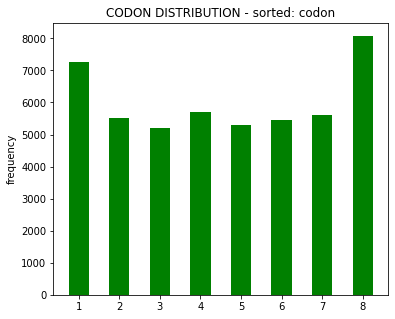

RYNUM_RY_TP53.txt


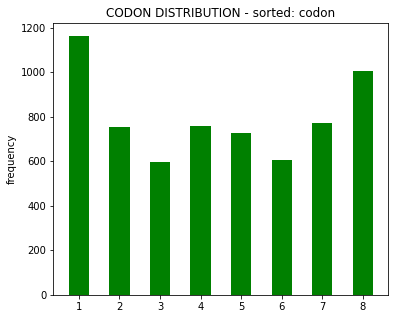

RYNUM_RY_TH.txt


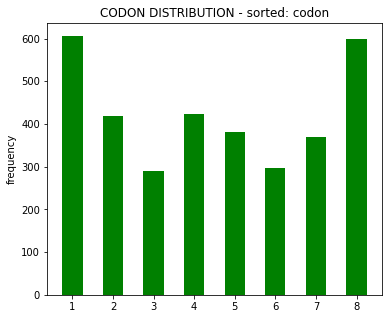

RYNUM_RY_AR.txt


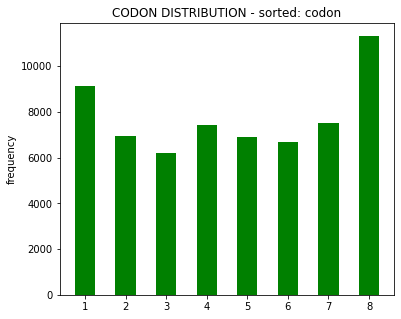

RYNUM_RY_DAXX.txt


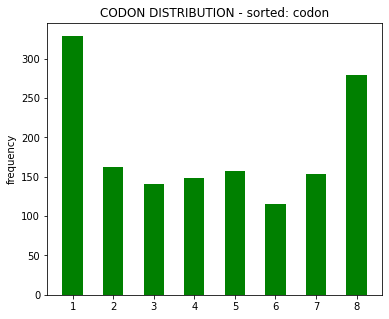

RYNUM_RY_DJ1.txt


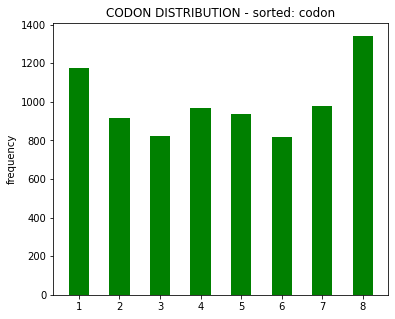

RYNUM_RY_PARKIN.txt


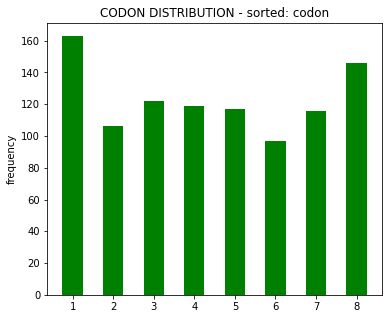

RYNUM_RY_BAX.txt


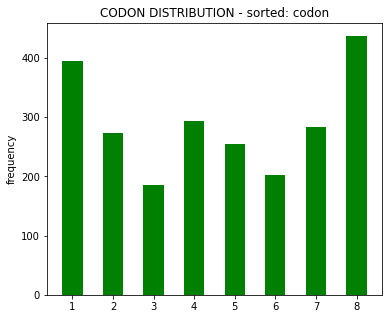

RYNUM_RY_SNCA.txt


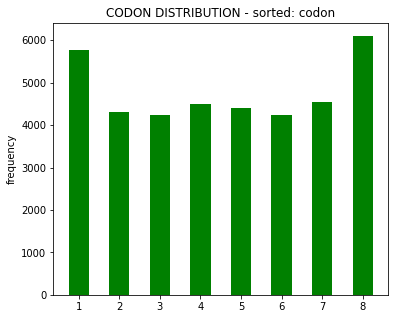

RYNUM_RY_NIT2.txt


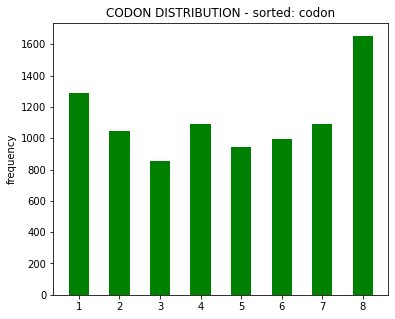

RYNUM_RY_MAP3K5.txt


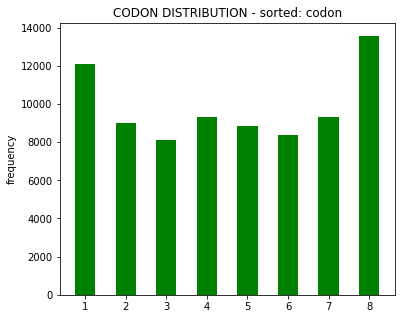

RYNUM_RY_ATP5J.txt


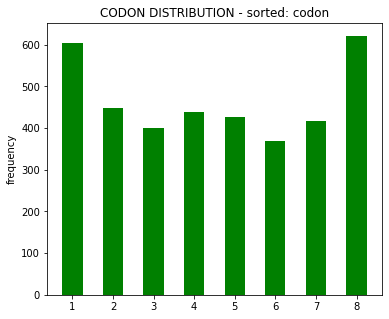

RYNUM_RY_PTEN.txt


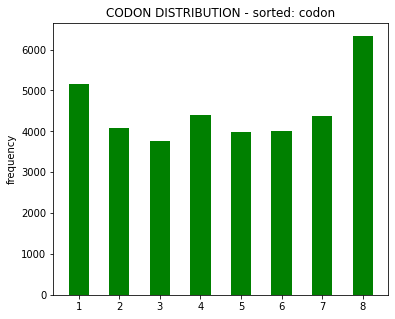

RYNUM_RY_SOD1.txt


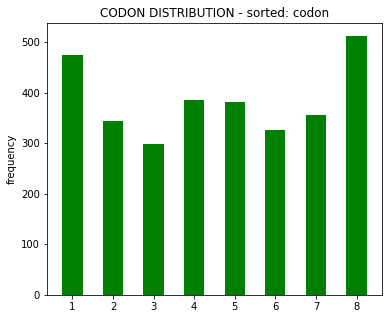

RYNUM_RY_IMPDH2.txt


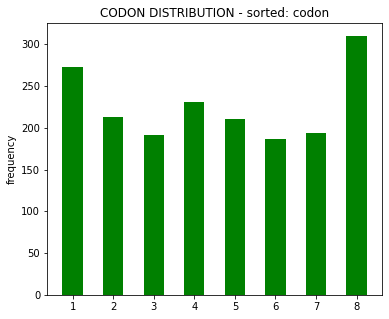

RYNUM_RY_ATP13A2.txt


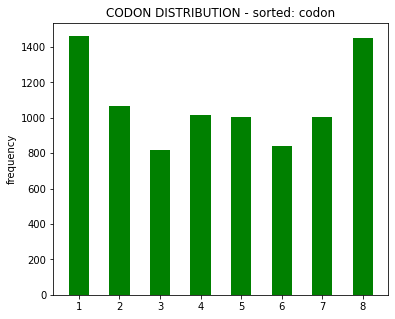

RYNUM_RY_SUMO1.txt


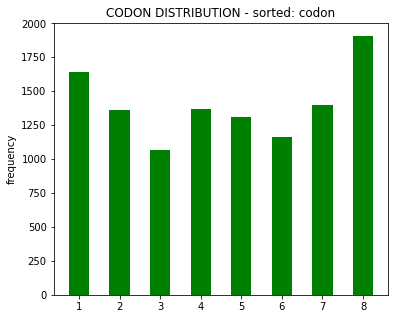

RYNUM_RY_ANXA7.txt


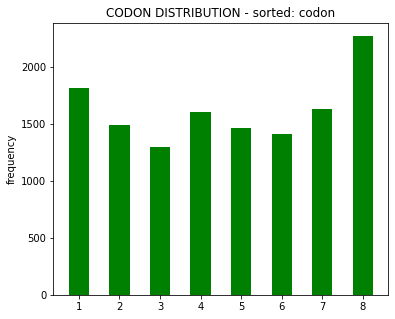

RYNUM_RY_PINK1.txt


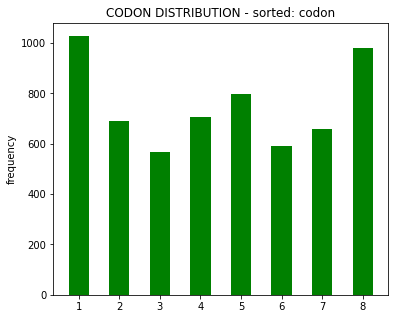

RYNUM_RY_PRDX5.txt


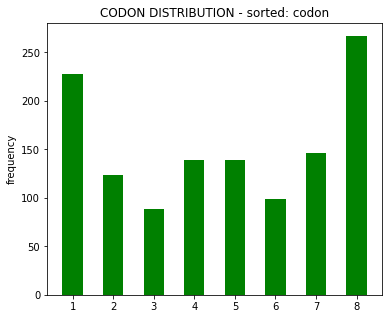

RYNUM_RY_PRDX2.txt


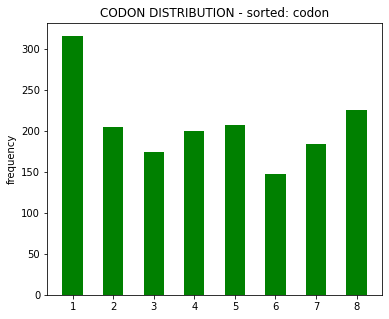

In [19]:
helper_function_4('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',1)

## Percentage of each codon

In [20]:
helper_function_5('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_DJ1',1)

RYNUM_RY_LRRK2.txt ----------
{'1': 15.077287459486413, '2': 11.439375051940496, '3': 10.818166708219064, '4': 11.852821407795231, '5': 11.00099725754176, '6': 11.354192636915151, '7': 11.68037895786587, '8': 16.776780520236017}

RYNUM_RY_TP53.txt ----------
{'1': 18.220272599091338, '2': 11.812627291242363, '3': 9.337302208992638, '4': 11.890960363465455, '5': 11.4209619301269, '6': 9.462635124549584, '7': 12.094626351245495, '8': 15.76061413128623}

RYNUM_RY_TH.txt ----------
{'1': 17.907801418439718, '2': 12.381796690307329, '3': 8.540189125295509, '4': 12.5, '5': 11.288416075650117, '6': 8.77659574468085, '7': 10.933806146572104, '8': 17.671394799054376}

RYNUM_RY_AR.txt ----------
{'1': 14.693162269489862, '2': 11.164166626473095, '3': 10.001768517178732, '4': 11.951960642454058, '5': 11.127188540008682, '6': 10.738114760687472, '7': 12.11112718854001, '8': 18.21251145516809}

RYNUM_RY_DAXX.txt ----------
{'1': 22.139973082099594, '2': 10.969044414535665, '3': 9.488559892328398, '

# PARKIN

## Unique patterns


### Finding unique patterns with pattern length 3

In [21]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',3)

RYNUM_RY_ATXN3.txt : patterns count: 512
RYNUM_RY_CDC20.txt : patterns count: 512
RYNUM_RY_CUL1.txt : patterns count: 512
RYNUM_RY_DJ1.txt : patterns count: 512
RYNUM_RY_FBXO40.txt : patterns count: 512
RYNUM_RY_CDC34.txt : patterns count: 502
RYNUM_RY_ATG7.txt : patterns count: 512
RYNUM_RY_FBXO7.txt : patterns count: 512
RYNUM_RY_FBXW7.txt : patterns count: 512
RYNUM_RY_RNF19A.txt : patterns count: 512
RYNUM_RY_UBE2G1.txt : patterns count: 512
RYNUM_RY_UBE2L3.txt : patterns count: 512
RYNUM_RY_SNCAIP.txt : patterns count: 512
RYNUM_RY_SQSTM1.txt : patterns count: 512
RYNUM_RY_UBE2E2.txt : patterns count: 512
RYNUM_RY_UBE2D3.txt : patterns count: 512
RYNUM_RY_UBE2V1.txt : patterns count: 512
RYNUM_RY_GPR37.txt : patterns count: 512
RYNUM_RY_RPS27A.txt : patterns count: 460
RYNUM_RY_UBE2E3.txt : patterns count: 512
RYNUM_RY_SIAH1.txt : patterns count: 512
RYNUM_RY_STUB1.txt : patterns count: 393
RYNUM_RY_WWP1.txt : patterns count: 512
RYNUM_RY_UBB.txt : patterns count: 301
RYNUM_RY_KEA

### Finding unique patterns with pattern length 4

In [22]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',4)

RYNUM_RY_ATXN3.txt : patterns count: 3767
RYNUM_RY_CDC20.txt : patterns count: 2648
RYNUM_RY_CUL1.txt : patterns count: 4087
RYNUM_RY_DJ1.txt : patterns count: 3133
RYNUM_RY_FBXO40.txt : patterns count: 4096
RYNUM_RY_CDC34.txt : patterns count: 1952
RYNUM_RY_ATG7.txt : patterns count: 4096
RYNUM_RY_FBXO7.txt : patterns count: 3340
RYNUM_RY_FBXW7.txt : patterns count: 4096
RYNUM_RY_RNF19A.txt : patterns count: 4051
RYNUM_RY_UBE2G1.txt : patterns count: 4063
RYNUM_RY_UBE2L3.txt : patterns count: 3921
RYNUM_RY_SNCAIP.txt : patterns count: 4096
RYNUM_RY_SQSTM1.txt : patterns count: 3437
RYNUM_RY_UBE2E2.txt : patterns count: 4096
RYNUM_RY_UBE2D3.txt : patterns count: 4057
RYNUM_RY_UBE2V1.txt : patterns count: 3591
RYNUM_RY_GPR37.txt : patterns count: 3189
RYNUM_RY_RPS27A.txt : patterns count: 1093
RYNUM_RY_UBE2E3.txt : patterns count: 4080
RYNUM_RY_SIAH1.txt : patterns count: 4037
RYNUM_RY_STUB1.txt : patterns count: 708
RYNUM_RY_WWP1.txt : patterns count: 4090
RYNUM_RY_UBB.txt : patterns c

### Finding qnique patterns with pattern length 5

In [23]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',5)

RYNUM_RY_ATXN3.txt : patterns count: 10067
RYNUM_RY_CDC20.txt : patterns count: 4527
RYNUM_RY_CUL1.txt : patterns count: 19100
RYNUM_RY_DJ1.txt : patterns count: 5979
RYNUM_RY_FBXO40.txt : patterns count: 23667
RYNUM_RY_CDC34.txt : patterns count: 2834
RYNUM_RY_ATG7.txt : patterns count: 28552
RYNUM_RY_FBXO7.txt : patterns count: 6809
RYNUM_RY_FBXW7.txt : patterns count: 27260
RYNUM_RY_RNF19A.txt : patterns count: 16377
RYNUM_RY_UBE2G1.txt : patterns count: 16862
RYNUM_RY_UBE2L3.txt : patterns count: 12960
RYNUM_RY_SNCAIP.txt : patterns count: 23667
RYNUM_RY_SQSTM1.txt : patterns count: 7823
RYNUM_RY_UBE2E2.txt : patterns count: 31064
RYNUM_RY_UBE2D3.txt : patterns count: 15643
RYNUM_RY_UBE2V1.txt : patterns count: 8701
RYNUM_RY_GPR37.txt : patterns count: 6244
RYNUM_RY_RPS27A.txt : patterns count: 1272
RYNUM_RY_UBE2E3.txt : patterns count: 17577
RYNUM_RY_SIAH1.txt : patterns count: 16389
RYNUM_RY_STUB1.txt : patterns count: 780
RYNUM_RY_WWP1.txt : patterns count: 21074
RYNUM_RY_UBB.tx

### Finding unique patterns with pattern length 6

In [24]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',6)

RYNUM_RY_ATXN3.txt : patterns count: 12616
RYNUM_RY_CDC20.txt : patterns count: 5092
RYNUM_RY_CUL1.txt : patterns count: 29732
RYNUM_RY_DJ1.txt : patterns count: 6847
RYNUM_RY_FBXO40.txt : patterns count: 43593
RYNUM_RY_CDC34.txt : patterns count: 3037
RYNUM_RY_ATG7.txt : patterns count: 69105
RYNUM_RY_FBXO7.txt : patterns count: 7783
RYNUM_RY_FBXW7.txt : patterns count: 58200
RYNUM_RY_RNF19A.txt : patterns count: 23416
RYNUM_RY_UBE2G1.txt : patterns count: 24884
RYNUM_RY_UBE2L3.txt : patterns count: 17886
RYNUM_RY_SNCAIP.txt : patterns count: 43593
RYNUM_RY_SQSTM1.txt : patterns count: 9377
RYNUM_RY_UBE2E2.txt : patterns count: 91943
RYNUM_RY_UBE2D3.txt : patterns count: 21925
RYNUM_RY_UBE2V1.txt : patterns count: 10543
RYNUM_RY_GPR37.txt : patterns count: 7104
RYNUM_RY_RPS27A.txt : patterns count: 1302
RYNUM_RY_UBE2E3.txt : patterns count: 25451
RYNUM_RY_SIAH1.txt : patterns count: 24349
RYNUM_RY_STUB1.txt : patterns count: 791
RYNUM_RY_WWP1.txt : patterns count: 34897
RYNUM_RY_UBB.t

### Finding uniuqe patterns with pattern length 7

In [25]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',7)

RYNUM_RY_ATXN3.txt : patterns count: 13413
RYNUM_RY_CDC20.txt : patterns count: 5245
RYNUM_RY_CUL1.txt : patterns count: 32351
RYNUM_RY_DJ1.txt : patterns count: 7119
RYNUM_RY_FBXO40.txt : patterns count: 49002
RYNUM_RY_CDC34.txt : patterns count: 3085
RYNUM_RY_ATG7.txt : patterns count: 84526
RYNUM_RY_FBXO7.txt : patterns count: 7960
RYNUM_RY_FBXW7.txt : patterns count: 67438
RYNUM_RY_RNF19A.txt : patterns count: 24988
RYNUM_RY_UBE2G1.txt : patterns count: 27211
RYNUM_RY_UBE2L3.txt : patterns count: 19455
RYNUM_RY_SNCAIP.txt : patterns count: 49002
RYNUM_RY_SQSTM1.txt : patterns count: 9784
RYNUM_RY_UBE2E2.txt : patterns count: 117323
RYNUM_RY_UBE2D3.txt : patterns count: 23351
RYNUM_RY_UBE2V1.txt : patterns count: 10963
RYNUM_RY_GPR37.txt : patterns count: 7268
RYNUM_RY_RPS27A.txt : patterns count: 1308
RYNUM_RY_UBE2E3.txt : patterns count: 27097
RYNUM_RY_SIAH1.txt : patterns count: 26613
RYNUM_RY_STUB1.txt : patterns count: 791
RYNUM_RY_WWP1.txt : patterns count: 38634
RYNUM_RY_UBB.

### Finding unique patterns with pattern length 8

In [26]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',8)

RYNUM_RY_ATXN3.txt : patterns count: 13802
RYNUM_RY_CDC20.txt : patterns count: 5315
RYNUM_RY_CUL1.txt : patterns count: 32981
RYNUM_RY_DJ1.txt : patterns count: 7265
RYNUM_RY_FBXO40.txt : patterns count: 50101
RYNUM_RY_CDC34.txt : patterns count: 3107
RYNUM_RY_ATG7.txt : patterns count: 88350
RYNUM_RY_FBXO7.txt : patterns count: 7992
RYNUM_RY_FBXW7.txt : patterns count: 69357
RYNUM_RY_RNF19A.txt : patterns count: 25365
RYNUM_RY_UBE2G1.txt : patterns count: 28145
RYNUM_RY_UBE2L3.txt : patterns count: 20209
RYNUM_RY_SNCAIP.txt : patterns count: 50101
RYNUM_RY_SQSTM1.txt : patterns count: 9949
RYNUM_RY_UBE2E2.txt : patterns count: 122999
RYNUM_RY_UBE2D3.txt : patterns count: 23762
RYNUM_RY_UBE2V1.txt : patterns count: 11113
RYNUM_RY_GPR37.txt : patterns count: 7290
RYNUM_RY_RPS27A.txt : patterns count: 1309
RYNUM_RY_UBE2E3.txt : patterns count: 27411
RYNUM_RY_SIAH1.txt : patterns count: 27470
RYNUM_RY_STUB1.txt : patterns count: 790
RYNUM_RY_WWP1.txt : patterns count: 39577
RYNUM_RY_UBB.

## Common patterns

### Finding common patterns with pattern length 3

In [27]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',3)

common patterns count: 149 : ['111', '728', '571', '122', '715', '858', '871', '215', '475', '451', '317', '428', '228', '185', '355', '557', '225', '733', '334', '517', '887', '127', '271', '513', '531', '881', '861', '281', '151', '181', '285', '572', '115', '152', '541', '376', '832', '246', '648', '527', '145', '588', '518', '711', '261', '314', '727', '282', '751', '511', '481', '852', '785', '128', '363', '244', '611', '874', '126', '161', '771', '813', '586', '532', '713', '732', '768', '114', '415', '613', '818', '585', '883', '841', '147', '137', '153', '847', '154', '324', '781', '477', '773', '343', '766', '165', '131', '854', '514', '718', '311', '157', '515', '371', '411', '287', '888', '184', '655', '814', '312', '431', '417', '338', '141', '224', '558', '351', '133', '388', '125', '327', '112', '187', '467', '878', '458', '853', '148', '447', '212', '833', '466', '135', '177', '747', '812', '628', '284', '535', '288', '113', '512', '834', '753', '272', '478', '422', '357

### Finding common patterns with pattern length 4

In [28]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',4)

common patterns count: 5 : ['3111', '1113', '1125', '8181', '7858']


### Finding common patterns with pattern length 5

In [29]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',5)

common patterns count: 0 : []


## Common locs

### common locs with pattern length 3

In [30]:
patterns = ['112', '832', '376', '513', '137', '541', '572', '458', '355', '148', '531', '251', '477', '411', '447', '518', '847', '431', '747', '732', '871', '852', '244', '317', '184', '124', '225', '343', '571', '185', '417', '472', '165', '131', '113', '351', '711', '728', '478', '551', '613', '858', '881', '282', '733', '751', '887', '628', '714', '126', '451', '511', '212', '466', '727', '527', '324', '768', '813', '854', '334', '285', '311', '161', '515', '611', '586', '187', '154', '145', '116', '284', '415', '514', '861', '588', '125', '771', '753', '261', '715', '153', '778', '535', '115', '532', '182', '422', '814', '766', '557', '127', '773', '152', '157', '648', '287', '128', '133', '246', '467', '874', '812', '512', '517', '173', '833', '312', '834', '475', '883', '338', '181', '853', '314', '151', '228', '363', '224', '177', '147', '888', '481', '878', '357', '215', '841', '585', '428', '371', '272', '111', '327', '114', '558', '785', '122', '281', '135', '141', '713', '781', '818', '288', '388', '525', '655', '718', '271']
common_loc_pattern(patterns,'/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN')

112: common locs: []
832: common locs: []
376: common locs: []
513: common locs: []
137: common locs: []
541: common locs: []
572: common locs: []
458: common locs: []
355: common locs: []
148: common locs: []
531: common locs: []
251: common locs: []
477: common locs: []
411: common locs: []
447: common locs: []
518: common locs: []
847: common locs: []
431: common locs: []
747: common locs: []
732: common locs: []
871: common locs: []
852: common locs: []
244: common locs: []
317: common locs: []
184: common locs: []
124: common locs: []
225: common locs: []
343: common locs: []
571: common locs: []
185: common locs: []
417: common locs: []
472: common locs: []
165: common locs: []
131: common locs: []
113: common locs: []
351: common locs: []
711: common locs: []
728: common locs: []
478: common locs: []
551: common locs: []
613: common locs: []
858: common locs: []
881: common locs: []
282: common locs: []
733: common locs: []
751: common locs: []
887: common locs: []
628: common l

### common locs of length 4

In [31]:
patterns = ['3111', '1113', '7858', '1125', '8181']
common_loc_pattern(patterns,'/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN')

3111: common locs: []
1113: common locs: []
7858: common locs: []
1125: common locs: []
8181: common locs: []


## codon distribution


In [32]:
helper_function_3('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN')

RYNUM_RY_ATXN3.txt : {'1': 2487, '2': 1812, '3': 1641, '4': 1976, '5': 1951, '6': 1600, '7': 1886, '8': 2670}
RYNUM_RY_CDC20.txt : {'1': 891, '2': 644, '3': 446, '4': 653, '5': 654, '6': 564, '7': 677, '8': 1029}
RYNUM_RY_CUL1.txt : {'1': 5086, '2': 4013, '3': 3497, '4': 4071, '5': 3920, '6': 3807, '7': 4172, '8': 5885}
RYNUM_RY_DJ1.txt : {'1': 1173, '2': 915, '3': 823, '4': 968, '5': 935, '6': 818, '7': 977, '8': 1341}
RYNUM_RY_FBXO40.txt : {'1': 8072, '2': 5727, '3': 5241, '4': 6004, '5': 5816, '6': 5309, '7': 5950, '8': 8836}
RYNUM_RY_CDC34.txt : {'1': 492, '2': 386, '3': 284, '4': 434, '5': 401, '6': 336, '7': 437, '8': 686}
RYNUM_RY_ATG7.txt : {'1': 15170, '2': 11051, '3': 9760, '4': 11453, '5': 11145, '6': 10028, '7': 11829, '8': 16999}
RYNUM_RY_FBXO7.txt : {'1': 1248, '2': 938, '3': 851, '4': 956, '5': 880, '6': 896, '7': 973, '8': 1308}
RYNUM_RY_FBXW7.txt : {'1': 10423, '2': 8176, '3': 7637, '4': 8547, '5': 8091, '6': 8056, '7': 8755, '8': 12425}
RYNUM_RY_RNF19A.txt : {'1': 442

## plot codon distribution

RYNUM_RY_ATXN3.txt


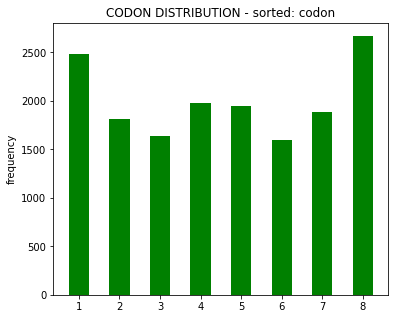

RYNUM_RY_CDC20.txt


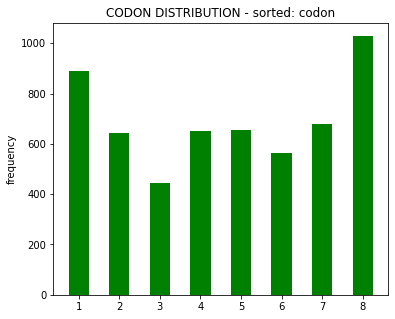

RYNUM_RY_CUL1.txt


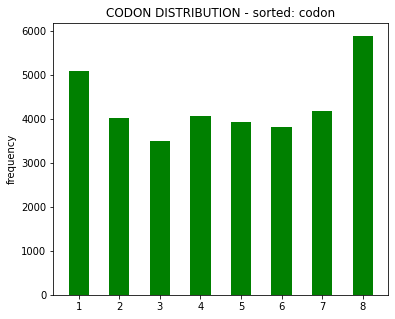

RYNUM_RY_DJ1.txt


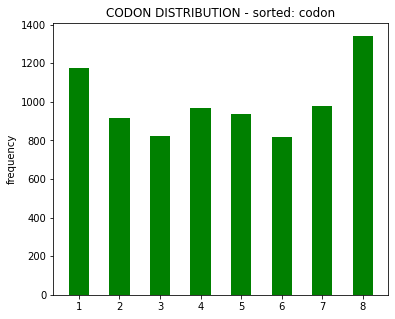

RYNUM_RY_FBXO40.txt


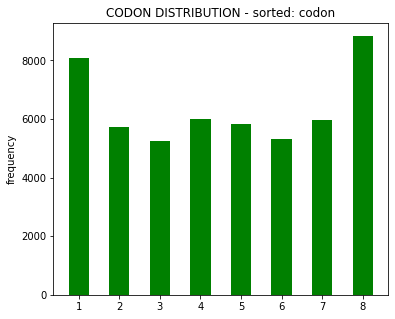

RYNUM_RY_CDC34.txt


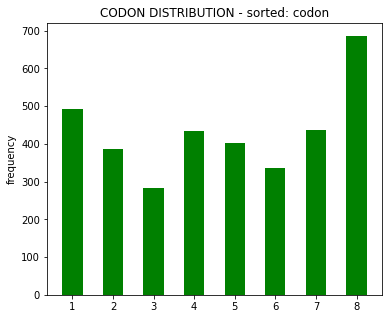

RYNUM_RY_ATG7.txt


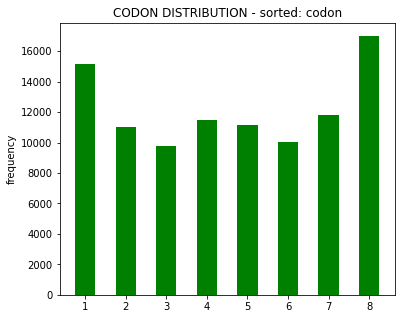

RYNUM_RY_FBXO7.txt


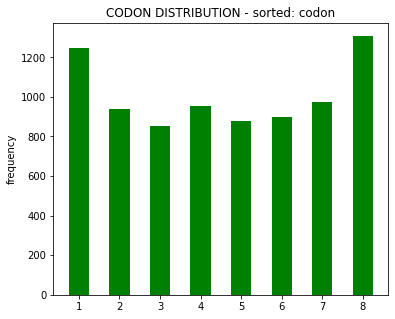

RYNUM_RY_FBXW7.txt


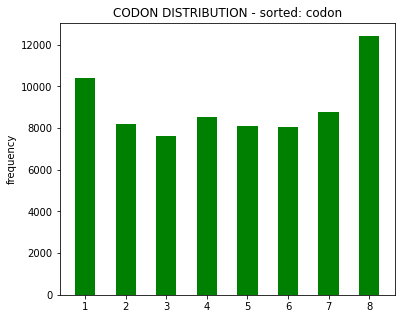

RYNUM_RY_RNF19A.txt


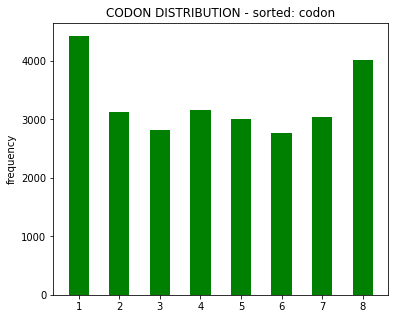

RYNUM_RY_UBE2G1.txt


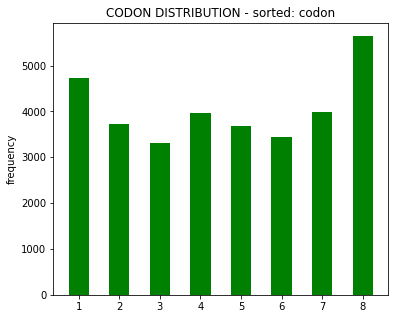

RYNUM_RY_UBE2L3.txt


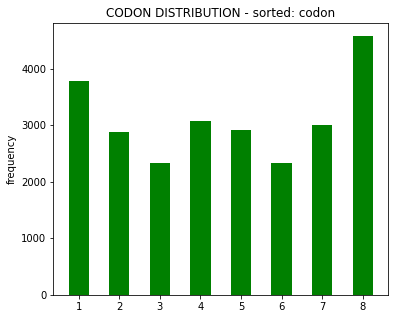

RYNUM_RY_SNCAIP.txt


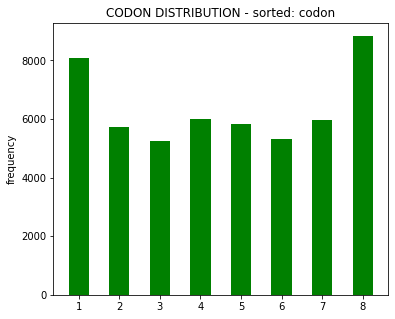

RYNUM_RY_SQSTM1.txt


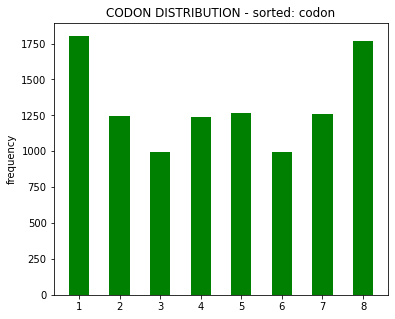

RYNUM_RY_UBE2E2.txt


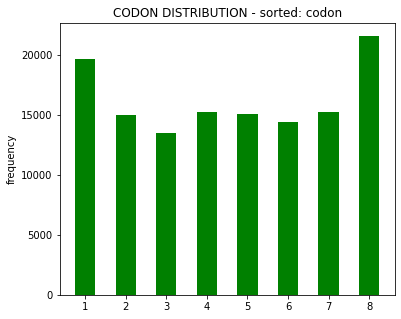

RYNUM_RY_UBE2D3.txt


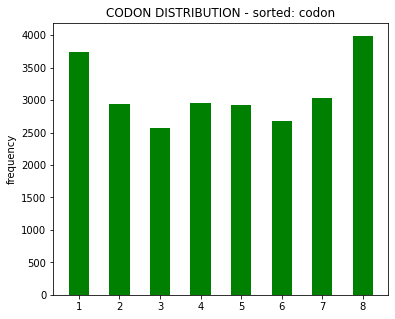

RYNUM_RY_UBE2V1.txt


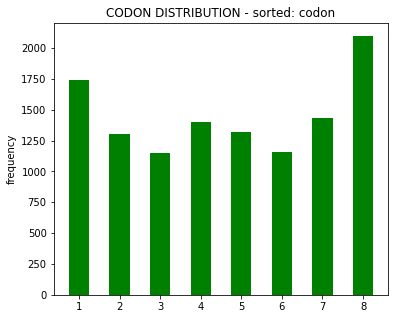

RYNUM_RY_GPR37.txt


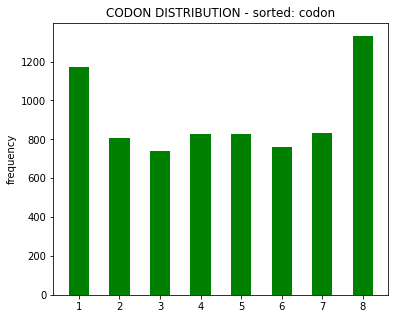

RYNUM_RY_RPS27A.txt


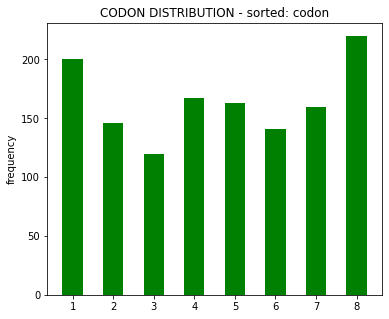

RYNUM_RY_UBE2E3.txt


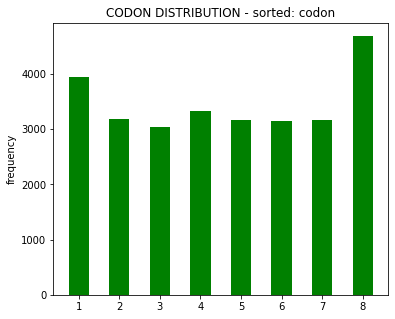

RYNUM_RY_SIAH1.txt


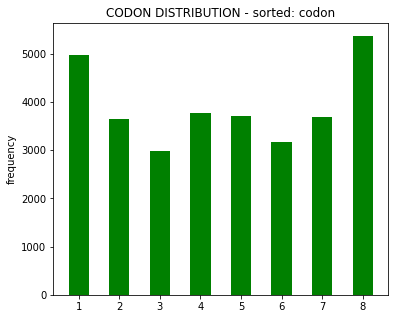

RYNUM_RY_STUB1.txt


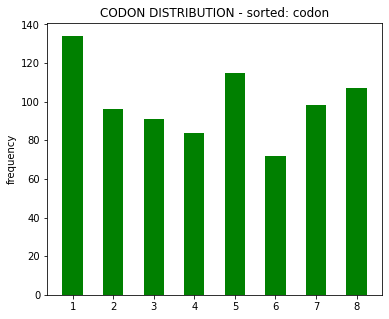

RYNUM_RY_WWP1.txt


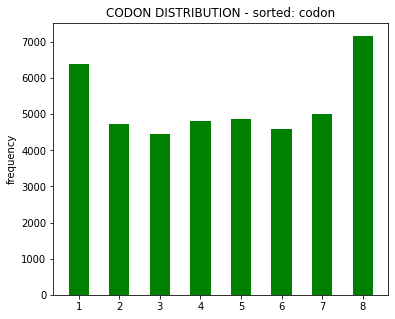

RYNUM_RY_UBB.txt


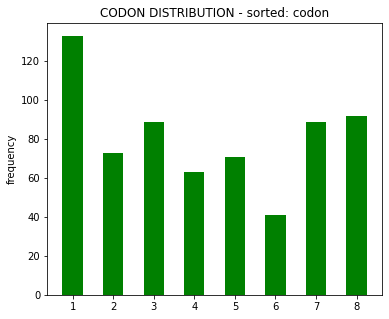

RYNUM_RY_KEAP1.txt


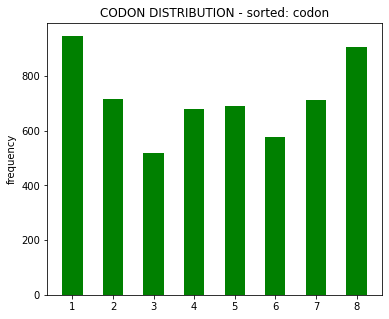

RYNUM_RY_RBCK1.txt


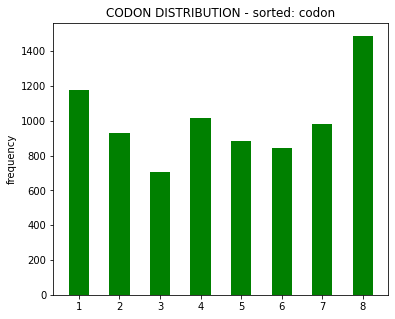

RYNUM_RY_FBXW8.txt


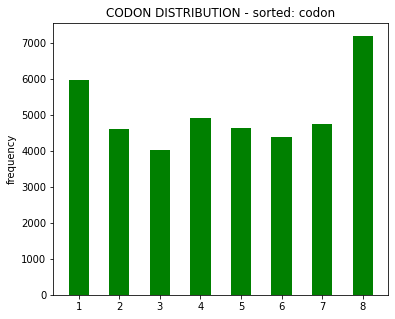

RYNUM_RY_UBA1.txt


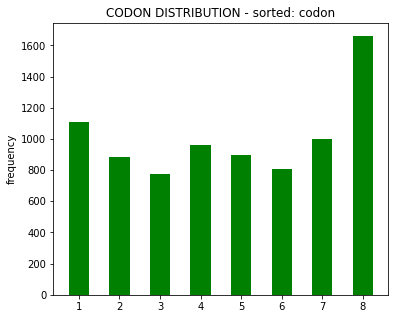

RYNUM_RY_FZR1.txt


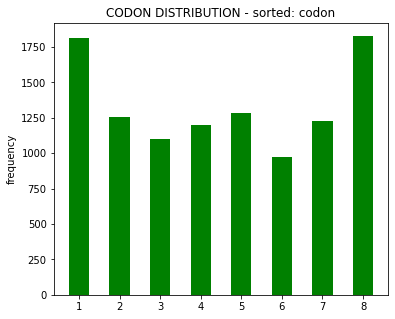

RYNUM_RY_PARKIN.txt


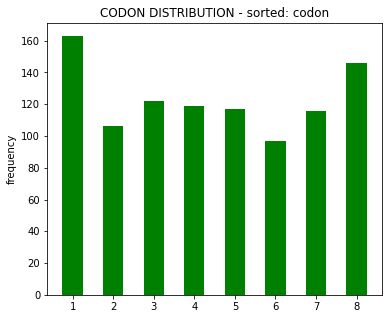

RYNUM_RY_LRRK2.txt


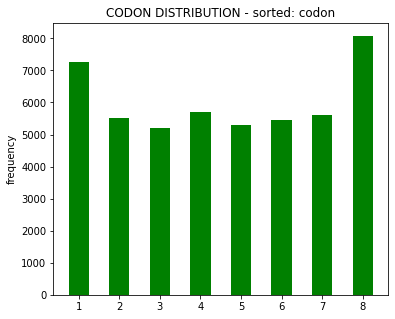

RYNUM_RY_UBE2K.txt


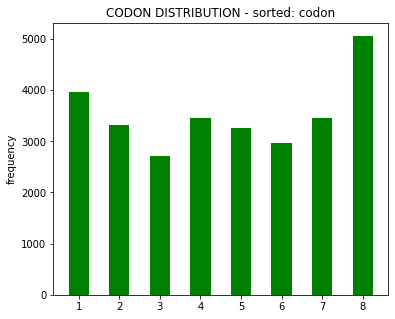

RYNUM_RY_UBE4A.txt


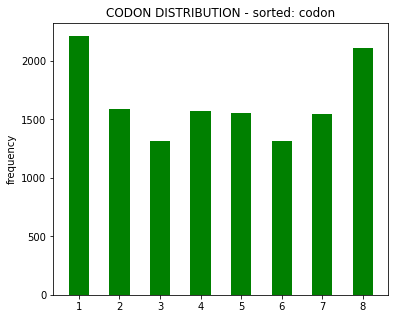

RYNUM_RY_SNCA.txt


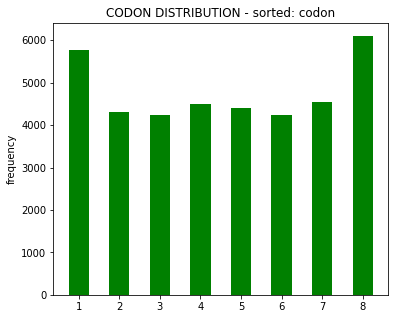

RYNUM_RY_UBE2J2.txt


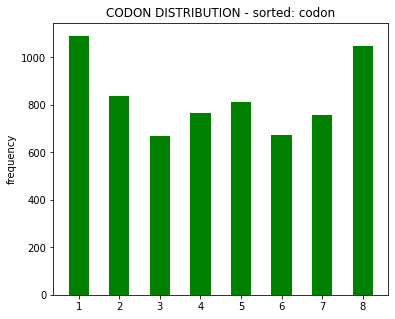

RYNUM_RY_UBE2G2.txt


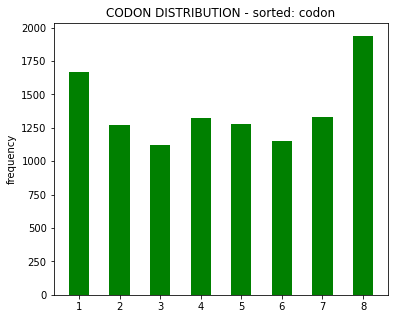

RYNUM_RY_RNF41.txt


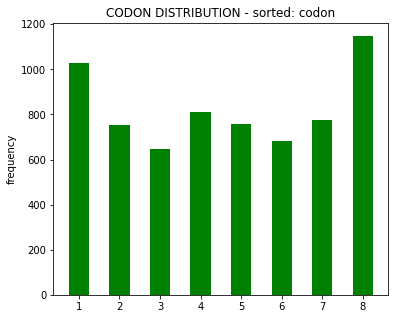

RYNUM_RY_PINK1.txt


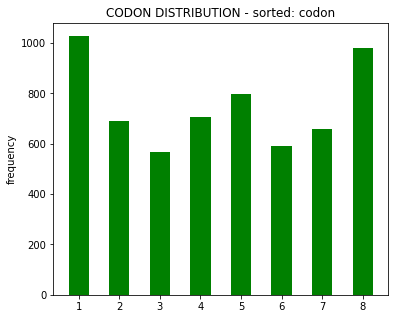

RYNUM_RY_UBE2M.txt


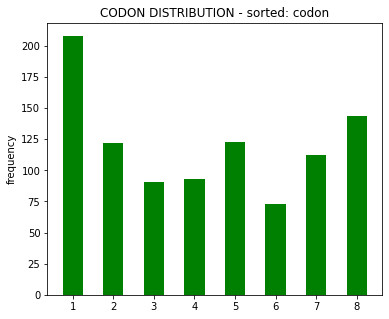

RYNUM_RY_MFN2.txt


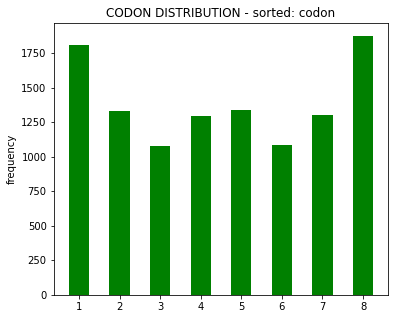

RYNUM_RY_UBE2S.txt


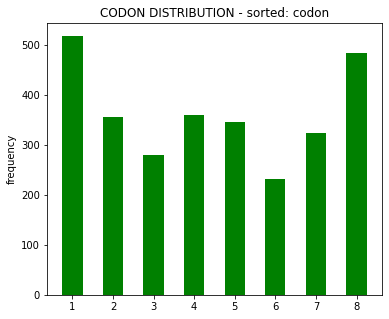

RYNUM_RY_UBE2D1.txt


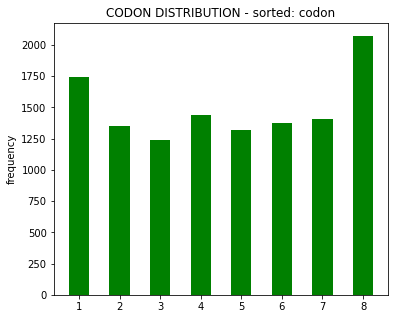

RYNUM_RY_MFN1.txt


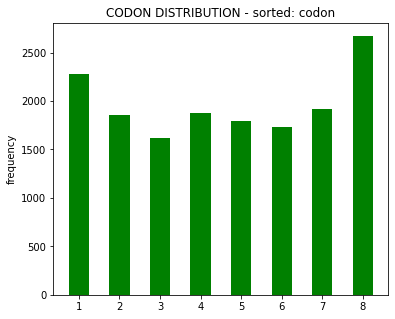

RYNUM_RY_VDAC1.txt


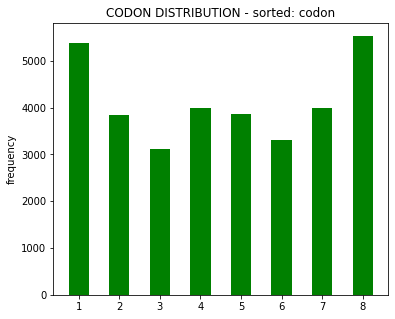

RYNUM_RY_UBE2D2.txt


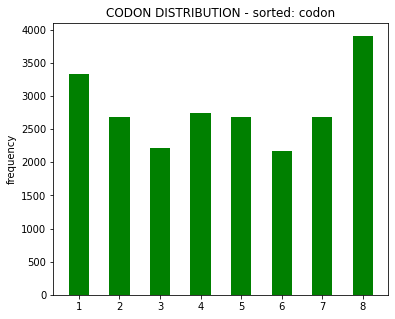

RYNUM_RY_UBE3A.txt


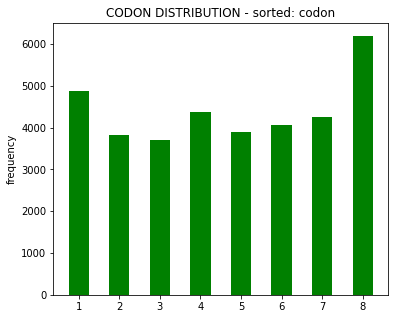

RYNUM_RY_UBE2N.txt


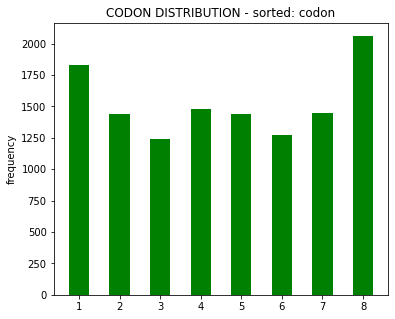

RYNUM_RY_UBE2J1.txt


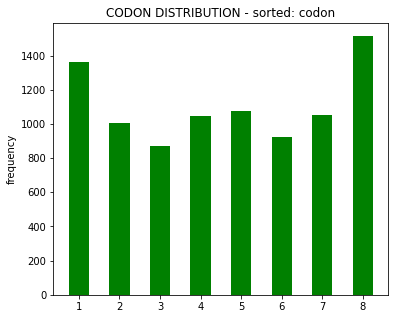

RYNUM_RY_UBE2E1.txt


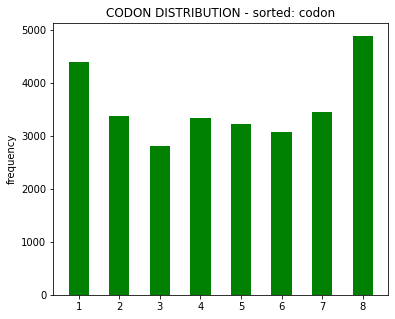

In [33]:
helper_function_4('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',1)

## percentage of each codon

In [34]:
helper_function_5('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PARKIN',1)

RYNUM_RY_ATXN3.txt ----------
{'1': 15.521437932971354, '2': 11.30874368095862, '3': 10.241527803782063, '4': 12.332272358484678, '5': 12.17624664544717, '6': 9.985645634400548, '7': 11.770579791549647, '8': 16.663546152405917}

RYNUM_RY_CDC20.txt ----------
{'1': 16.030946383591218, '2': 11.586901763224182, '3': 8.024469233537243, '4': 11.748830514573589, '5': 11.766822598056855, '6': 10.147535084562792, '7': 12.180640518172005, '8': 18.513853904282115}

RYNUM_RY_CUL1.txt ----------
{'1': 14.762996719979101, '2': 11.648428202374387, '3': 10.150648747496446, '4': 11.816783257380047, '5': 11.378479579692897, '6': 11.050477489768076, '7': 12.109953266958868, '8': 17.08223273635018}

RYNUM_RY_DJ1.txt ----------
{'1': 14.754716981132077, '2': 11.50943396226415, '3': 10.352201257861635, '4': 12.176100628930818, '5': 11.761006289308176, '6': 10.289308176100628, '7': 12.28930817610063, '8': 16.867924528301888}

RYNUM_RY_FBXO40.txt ----------
{'1': 15.841428711608282, '2': 11.239328819546659, 

# PINK1

## Unique patterns

### Finding unique patterns og length 3

In [35]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',3)

RYNUM_RY_TOMM5.txt : patterns count: 461
RYNUM_RY_RPS27A.txt : patterns count: 460
RYNUM_RY_VDAC1.txt : patterns count: 512
RYNUM_RY_TOMM20.txt : patterns count: 511
RYNUM_RY_MTERFD1.txt : patterns count: 512
RYNUM_RY_HTRA2.txt : patterns count: 463
RYNUM_RY_HSP90AA1.txt : patterns count: 512
RYNUM_RY_MFN2.txt : patterns count: 512
RYNUM_RY_TOMM40.txt : patterns count: 507
RYNUM_RY_TOMM7.txt : patterns count: 507
RYNUM_RY_ATP13A2.txt : patterns count: 512
RYNUM_RY_TOMM22.txt : patterns count: 439
RYNUM_RY_TOMM70A.txt : patterns count: 512
RYNUM_RY_UBA52.txt : patterns count: 511
RYNUM_RY_RHOT1.txt : patterns count: 512
RYNUM_RY_UBB.txt : patterns count: 301
RYNUM_RY_SNCA.txt : patterns count: 512
RYNUM_RY_MFN1.txt : patterns count: 512
RYNUM_RY_PINK1.txt : patterns count: 511
RYNUM_RY_TOMM6.txt : patterns count: 375
RYNUM_RY_PGAM5.txt : patterns count: 509
RYNUM_RY_PARKIN.txt : patterns count: 430
RYNUM_RY_SQSTM1.txt : patterns count: 512
RYNUM_RY_DJ1.txt : patterns count: 512
RYNUM_RY

### Finding unique patternns of  length 4

In [36]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',4)

RYNUM_RY_TOMM5.txt : patterns count: 1133
RYNUM_RY_RPS27A.txt : patterns count: 1093
RYNUM_RY_VDAC1.txt : patterns count: 4049
RYNUM_RY_TOMM20.txt : patterns count: 2976
RYNUM_RY_MTERFD1.txt : patterns count: 3206
RYNUM_RY_HTRA2.txt : patterns count: 1123
RYNUM_RY_HSP90AA1.txt : patterns count: 3837
RYNUM_RY_MFN2.txt : patterns count: 3497
RYNUM_RY_TOMM40.txt : patterns count: 2217
RYNUM_RY_TOMM7.txt : patterns count: 2079
RYNUM_RY_ATP13A2.txt : patterns count: 3120
RYNUM_RY_TOMM22.txt : patterns count: 963
RYNUM_RY_TOMM70A.txt : patterns count: 3755
RYNUM_RY_UBA52.txt : patterns count: 2280
RYNUM_RY_RHOT1.txt : patterns count: 4079
RYNUM_RY_UBB.txt : patterns count: 468
RYNUM_RY_SNCA.txt : patterns count: 4092
RYNUM_RY_MFN1.txt : patterns count: 3894
RYNUM_RY_PINK1.txt : patterns count: 2851
RYNUM_RY_TOMM6.txt : patterns count: 658
RYNUM_RY_PGAM5.txt : patterns count: 2202
RYNUM_RY_PARKIN.txt : patterns count: 863
RYNUM_RY_SQSTM1.txt : patterns count: 3437
RYNUM_RY_DJ1.txt : patterns 

### Finding unique patterns of length 5

In [37]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',5)

RYNUM_RY_TOMM5.txt : patterns count: 1348
RYNUM_RY_RPS27A.txt : patterns count: 1272
RYNUM_RY_VDAC1.txt : patterns count: 16857
RYNUM_RY_TOMM20.txt : patterns count: 5247
RYNUM_RY_MTERFD1.txt : patterns count: 6286
RYNUM_RY_HTRA2.txt : patterns count: 1331
RYNUM_RY_HSP90AA1.txt : patterns count: 11617
RYNUM_RY_MFN2.txt : patterns count: 8105
RYNUM_RY_TOMM40.txt : patterns count: 3447
RYNUM_RY_TOMM7.txt : patterns count: 3009
RYNUM_RY_ATP13A2.txt : patterns count: 6333
RYNUM_RY_TOMM22.txt : patterns count: 1113
RYNUM_RY_TOMM70A.txt : patterns count: 9399
RYNUM_RY_UBA52.txt : patterns count: 3556
RYNUM_RY_RHOT1.txt : patterns count: 17854
RYNUM_RY_UBB.txt : patterns count: 500
RYNUM_RY_SNCA.txt : patterns count: 20819
RYNUM_RY_MFN1.txt : patterns count: 11164
RYNUM_RY_PINK1.txt : patterns count: 4961
RYNUM_RY_TOMM6.txt : patterns count: 750
RYNUM_RY_PGAM5.txt : patterns count: 3293
RYNUM_RY_PARKIN.txt : patterns count: 958
RYNUM_RY_SQSTM1.txt : patterns count: 7823
RYNUM_RY_DJ1.txt : pat

###  Finding unique patterns of length 6

In [38]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',6)

RYNUM_RY_TOMM5.txt : patterns count: 1386
RYNUM_RY_RPS27A.txt : patterns count: 1302
RYNUM_RY_VDAC1.txt : patterns count: 25178
RYNUM_RY_TOMM20.txt : patterns count: 5865
RYNUM_RY_MTERFD1.txt : patterns count: 7120
RYNUM_RY_HTRA2.txt : patterns count: 1366
RYNUM_RY_HSP90AA1.txt : patterns count: 15296
RYNUM_RY_MFN2.txt : patterns count: 9759
RYNUM_RY_TOMM40.txt : patterns count: 3788
RYNUM_RY_TOMM7.txt : patterns count: 3259
RYNUM_RY_ATP13A2.txt : patterns count: 7394
RYNUM_RY_TOMM22.txt : patterns count: 1141
RYNUM_RY_TOMM70A.txt : patterns count: 11341
RYNUM_RY_UBA52.txt : patterns count: 3939
RYNUM_RY_RHOT1.txt : patterns count: 27424
RYNUM_RY_UBB.txt : patterns count: 509
RYNUM_RY_SNCA.txt : patterns count: 33378
RYNUM_RY_MFN1.txt : patterns count: 13922
RYNUM_RY_PINK1.txt : patterns count: 5541
RYNUM_RY_TOMM6.txt : patterns count: 774
RYNUM_RY_PGAM5.txt : patterns count: 3571
RYNUM_RY_PARKIN.txt : patterns count: 973
RYNUM_RY_SQSTM1.txt : patterns count: 9377
RYNUM_RY_DJ1.txt : pa

### Finding unique patterns of length 7

In [40]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',7)

RYNUM_RY_TOMM5.txt : patterns count: 1397
RYNUM_RY_RPS27A.txt : patterns count: 1308
RYNUM_RY_VDAC1.txt : patterns count: 27611
RYNUM_RY_TOMM20.txt : patterns count: 6046
RYNUM_RY_MTERFD1.txt : patterns count: 7289
RYNUM_RY_HTRA2.txt : patterns count: 1376
RYNUM_RY_HSP90AA1.txt : patterns count: 16404
RYNUM_RY_MFN2.txt : patterns count: 10173
RYNUM_RY_TOMM40.txt : patterns count: 3911
RYNUM_RY_TOMM7.txt : patterns count: 3326
RYNUM_RY_ATP13A2.txt : patterns count: 7698
RYNUM_RY_TOMM22.txt : patterns count: 1147
RYNUM_RY_TOMM70A.txt : patterns count: 11774
RYNUM_RY_UBA52.txt : patterns count: 4087
RYNUM_RY_RHOT1.txt : patterns count: 30217
RYNUM_RY_UBB.txt : patterns count: 514
RYNUM_RY_SNCA.txt : patterns count: 36466
RYNUM_RY_MFN1.txt : patterns count: 14558
RYNUM_RY_PINK1.txt : patterns count: 5685
RYNUM_RY_TOMM6.txt : patterns count: 780
RYNUM_RY_PGAM5.txt : patterns count: 3670
RYNUM_RY_PARKIN.txt : patterns count: 976
RYNUM_RY_SQSTM1.txt : patterns count: 9784
RYNUM_RY_DJ1.txt : p

### finding unique patterns of length of 8

In [41]:
helper_funtion('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',8)

RYNUM_RY_TOMM5.txt : patterns count: 1397
RYNUM_RY_RPS27A.txt : patterns count: 1309
RYNUM_RY_VDAC1.txt : patterns count: 28539
RYNUM_RY_TOMM20.txt : patterns count: 6135
RYNUM_RY_MTERFD1.txt : patterns count: 7327
RYNUM_RY_HTRA2.txt : patterns count: 1377
RYNUM_RY_HSP90AA1.txt : patterns count: 16923
RYNUM_RY_MFN2.txt : patterns count: 10346
RYNUM_RY_TOMM40.txt : patterns count: 3970
RYNUM_RY_TOMM7.txt : patterns count: 3350
RYNUM_RY_ATP13A2.txt : patterns count: 7856
RYNUM_RY_TOMM22.txt : patterns count: 1148
RYNUM_RY_TOMM70A.txt : patterns count: 11921
RYNUM_RY_UBA52.txt : patterns count: 4169
RYNUM_RY_RHOT1.txt : patterns count: 31284
RYNUM_RY_UBB.txt : patterns count: 515
RYNUM_RY_SNCA.txt : patterns count: 37136
RYNUM_RY_MFN1.txt : patterns count: 14774
RYNUM_RY_PINK1.txt : patterns count: 5751
RYNUM_RY_TOMM6.txt : patterns count: 783
RYNUM_RY_PGAM5.txt : patterns count: 3715
RYNUM_RY_PARKIN.txt : patterns count: 977
RYNUM_RY_SQSTM1.txt : patterns count: 9949
RYNUM_RY_DJ1.txt : p

## common patterns

### Common patterns of length 3

In [43]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',3)

common patterns count: 141 : ['111', '728', '571', '533', '715', '858', '871', '134', '612', '215', '475', '178', '428', '317', '787', '228', '347', '355', '225', '733', '887', '127', '271', '513', '881', '861', '143', '281', '581', '572', '115', '152', '541', '731', '851', '645', '278', '246', '746', '527', '145', '588', '882', '518', '485', '711', '261', '414', '727', '282', '716', '751', '146', '481', '784', '785', '886', '363', '244', '874', '532', '684', '713', '722', '732', '768', '114', '767', '818', '585', '883', '841', '147', '137', '153', '847', '154', '781', '477', '448', '165', '131', '854', '514', '311', '157', '515', '371', '838', '214', '287', '888', '312', '431', '417', '141', '224', '388', '736', '125', '112', '187', '274', '454', '653', '273', '382', '868', '878', '286', '458', '148', '438', '212', '447', '837', '135', '177', '747', '628', '384', '631', '284', '834', '512', '221', '753', '272', '478', '525', '551', '124', '251', '162', '116', '555', '188', '472', '778

### common patterns of length 4

In [44]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',4)

common patterns count: 1 : ['8883']


### common patterns of length 5

In [45]:
helper_function_2('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',5)

common patterns count: 0 : []


## Common locs

### common locs with pattern length 3

In [46]:
patterns = ['111', '728', '571', '533', '715', '858', '871', '134', '612', '215', '475', '178', '428', '317', '787', '228', '347', '355', '225', '733', '887', '127', '271', '513', '881', '861', '143', '281', '581', '572', '115', '152', '541', '731', '851', '645', '278', '246', '746', '527', '145', '588', '882', '518', '485', '711', '261', '414', '727', '282', '716', '751', '146', '481', '784', '785', '886', '363', '244', '874', '532', '684', '713', '722', '732', '768', '114', '767', '818', '585', '883', '841', '147', '137', '153', '847', '154', '781', '477', '448', '165', '131', '854', '514', '311', '157', '515', '371', '838', '214', '287', '888', '312', '431', '417', '141', '224', '388', '736', '125', '112', '187', '274', '454', '653', '273', '382', '868', '878', '286', '458', '148', '438', '212', '447', '837', '135', '177', '747', '628', '384', '631', '284', '834', '512', '221', '753', '272', '478', '525', '551', '124', '251', '162', '116', '555', '188', '472', '778', '173', '714']
common_loc_pattern(patterns,'/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1')

111: common locs: []
728: common locs: []
571: common locs: []
533: common locs: []
715: common locs: []
858: common locs: []
871: common locs: []
134: common locs: []
612: common locs: []
215: common locs: []
475: common locs: []
178: common locs: []
428: common locs: []
317: common locs: []
787: common locs: []
228: common locs: []
347: common locs: []
355: common locs: []
225: common locs: []
733: common locs: []
887: common locs: []
127: common locs: []
271: common locs: []
513: common locs: []
881: common locs: []
861: common locs: []
143: common locs: []
281: common locs: []
581: common locs: []
572: common locs: []
115: common locs: []
152: common locs: []
541: common locs: []
731: common locs: []
851: common locs: []
645: common locs: []
278: common locs: []
246: common locs: []
746: common locs: []
527: common locs: []
145: common locs: []
588: common locs: []
882: common locs: []
518: common locs: []
485: common locs: []
711: common locs: []
261: common locs: []
414: common l

### common locs with patterns length 4

In [47]:
patterns = ['8883']
common_loc_pattern(patterns,'/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1')

8883: common locs: []


## codon distribution

In [48]:
helper_function_3('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1')

RYNUM_RY_TOMM5.txt : {'1': 227, '2': 147, '3': 136, '4': 174, '5': 167, '6': 146, '7': 161, '8': 251}
RYNUM_RY_RPS27A.txt : {'1': 200, '2': 146, '3': 120, '4': 167, '5': 163, '6': 141, '7': 160, '8': 220}
RYNUM_RY_VDAC1.txt : {'1': 5384, '2': 3848, '3': 3116, '4': 3988, '5': 3868, '6': 3306, '7': 4000, '8': 5529}
RYNUM_RY_TOMM20.txt : {'1': 937, '2': 752, '3': 661, '4': 791, '5': 826, '6': 683, '7': 825, '8': 1024}
RYNUM_RY_MTERFD1.txt : {'1': 1085, '2': 853, '3': 643, '4': 891, '5': 864, '6': 812, '7': 885, '8': 1372}
RYNUM_RY_HTRA2.txt : {'1': 226, '2': 175, '3': 130, '4': 148, '5': 159, '6': 133, '7': 173, '8': 240}
RYNUM_RY_HSP90AA1.txt : {'1': 3511, '2': 2447, '3': 1985, '4': 2262, '5': 2404, '6': 1819, '7': 2290, '8': 2951}
RYNUM_RY_MFN2.txt : {'1': 1809, '2': 1334, '3': 1076, '4': 1291, '5': 1340, '6': 1085, '7': 1302, '8': 1874}
RYNUM_RY_TOMM40.txt : {'1': 691, '2': 490, '3': 388, '4': 474, '5': 508, '6': 366, '7': 492, '8': 747}
RYNUM_RY_TOMM7.txt : {'1': 453, '2': 337, '3': 3

## Plot codon distribution

RYNUM_RY_TOMM5.txt


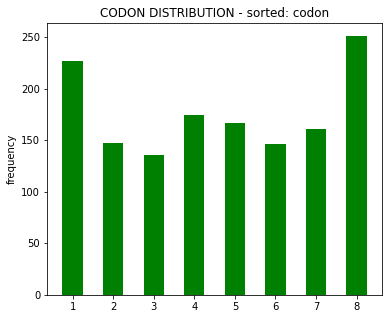

RYNUM_RY_RPS27A.txt


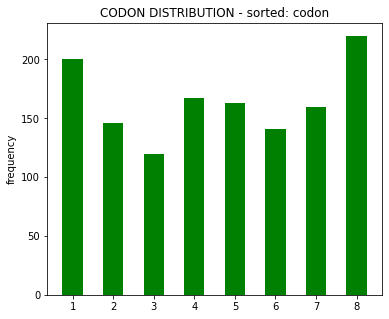

RYNUM_RY_VDAC1.txt


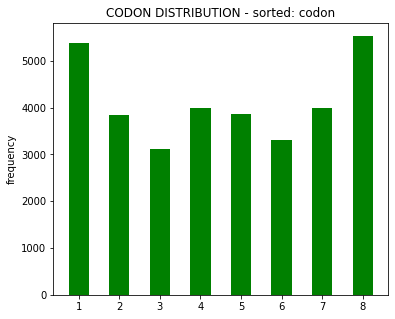

RYNUM_RY_TOMM20.txt


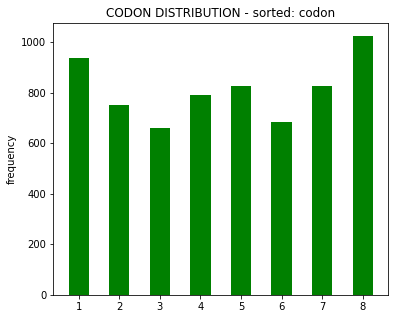

RYNUM_RY_MTERFD1.txt


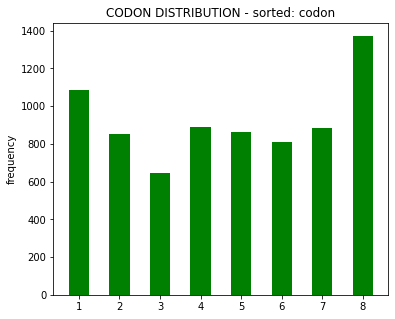

RYNUM_RY_HTRA2.txt


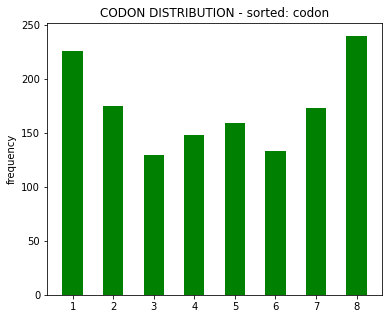

RYNUM_RY_HSP90AA1.txt


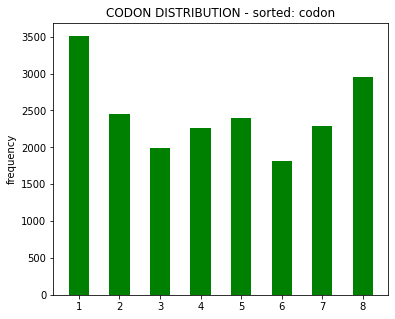

RYNUM_RY_MFN2.txt


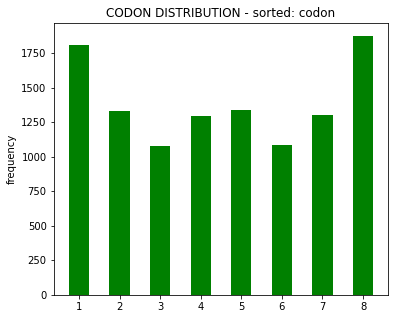

RYNUM_RY_TOMM40.txt


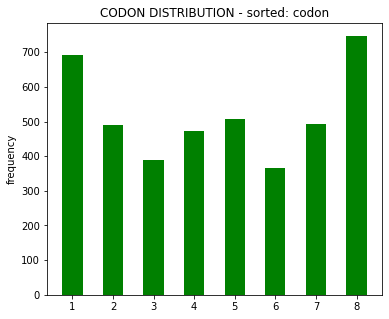

RYNUM_RY_TOMM7.txt


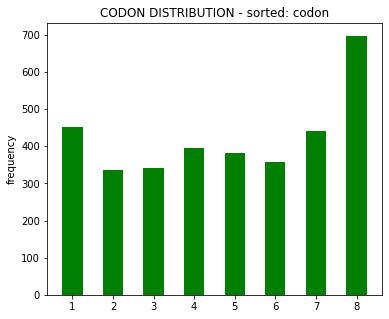

RYNUM_RY_ATP13A2.txt


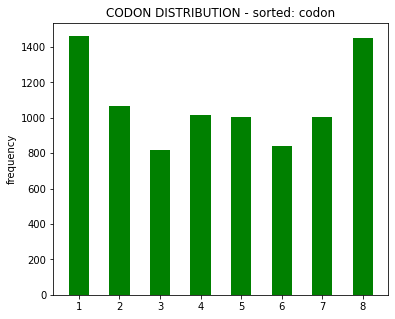

RYNUM_RY_TOMM22.txt


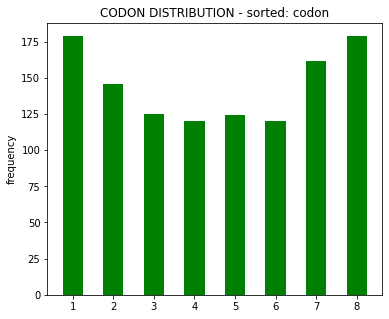

RYNUM_RY_TOMM70A.txt


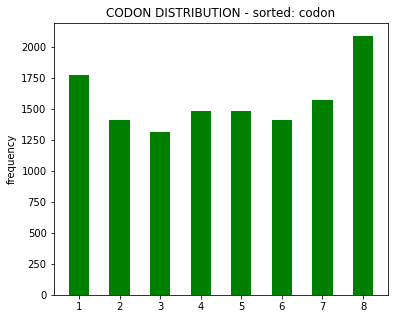

RYNUM_RY_UBA52.txt


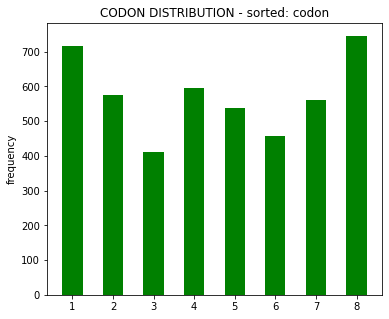

RYNUM_RY_RHOT1.txt


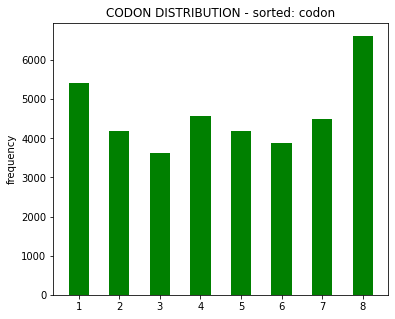

RYNUM_RY_UBB.txt


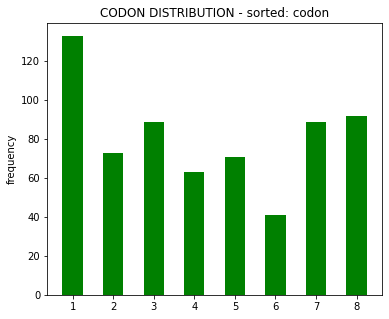

RYNUM_RY_SNCA.txt


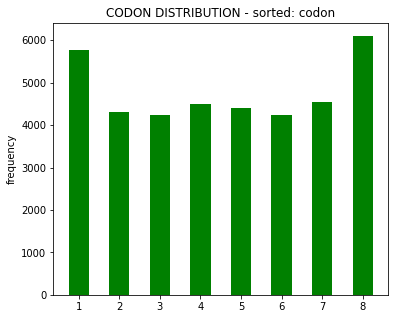

RYNUM_RY_MFN1.txt


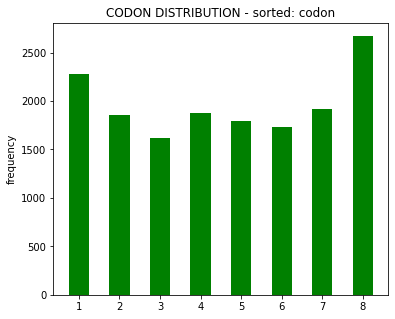

RYNUM_RY_PINK1.txt


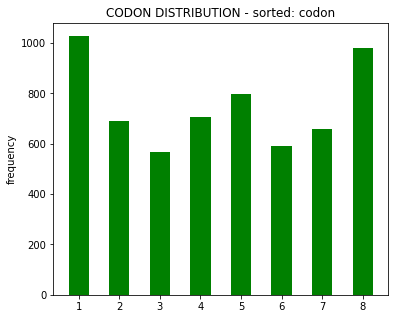

RYNUM_RY_TOMM6.txt


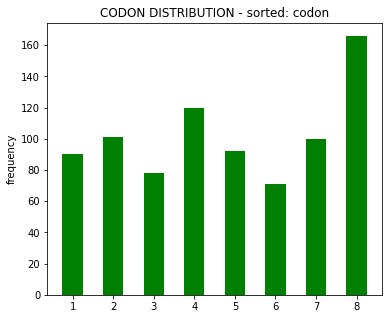

RYNUM_RY_PGAM5.txt


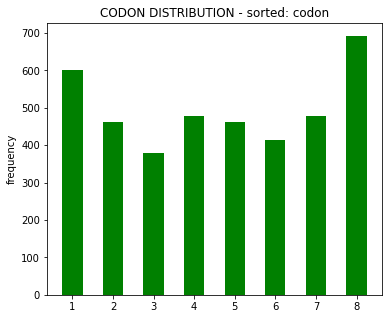

RYNUM_RY_PARKIN.txt


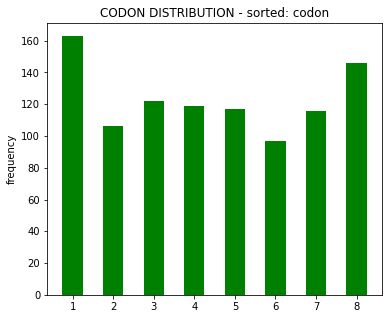

RYNUM_RY_SQSTM1.txt


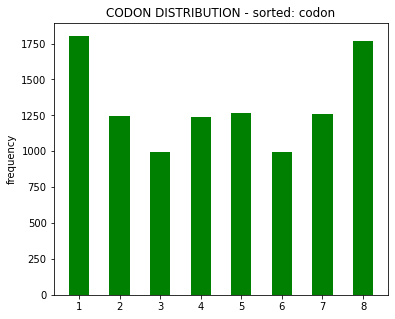

RYNUM_RY_DJ1.txt


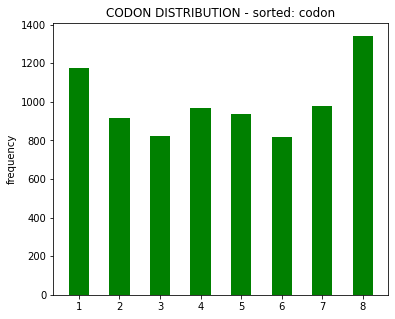

RYNUM_RY_AKT1.txt


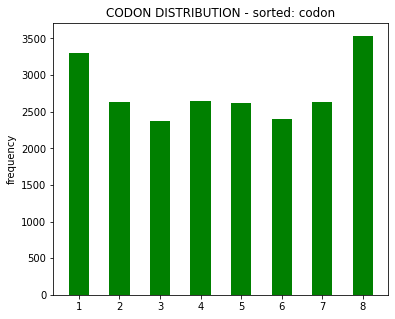

RYNUM_RY_BECN1.txt


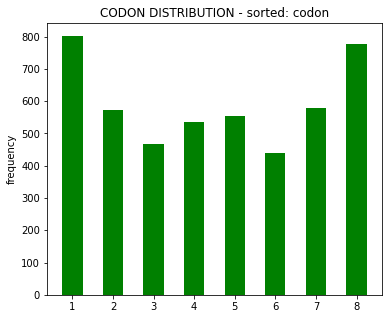

RYNUM_RY_DNM1L.txt


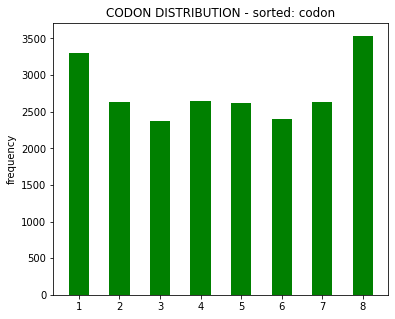

RYNUM_RY_LRRK2.txt


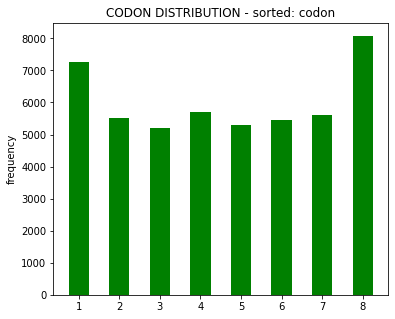

In [49]:
helper_function_4('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',1)

## percentage of each codon

In [50]:
helper_function_5('/gdrive/My Drive/Genomics/job/data/Output_RYNUM/RYNUM_output_RY_PINK1',1)

RYNUM_RY_TOMM5.txt ----------
{'1': 16.11071682044003, '2': 10.432931156848829, '3': 9.65223562810504, '4': 12.349183818310859, '5': 11.85237757274663, '6': 10.361958836053939, '7': 11.426543647977288, '8': 17.814052519517386}

RYNUM_RY_RPS27A.txt ----------
{'1': 15.186028853454822, '2': 11.08580106302202, '3': 9.111617312072893, '4': 12.680334092634777, '5': 12.37661351556568, '6': 10.70615034168565, '7': 12.148823082763856, '8': 16.704631738800305}

RYNUM_RY_VDAC1.txt ----------
{'1': 16.295892732830897, '2': 11.646841611428917, '3': 9.431278186385786, '4': 12.070583250098368, '5': 11.707376131238838, '6': 10.006356124580043, '7': 12.106903961984322, '8': 16.734768001452828}

RYNUM_RY_TOMM20.txt ----------
{'1': 14.417602708108939, '2': 11.571010924757655, '3': 10.170795507001078, '4': 12.171103246653331, '5': 12.709647638098168, '6': 10.509309124480689, '7': 12.69426065548546, '8': 15.756270195414679}

RYNUM_RY_MTERFD1.txt ----------
{'1': 14.652261985145174, '2': 11.51924375422012

# CONCLUSION
could not find any common pattern at same location for 3 of the hub genes